# D208 Task Two: Logistic Regression

##### Submitted by Kimberly Hubacek Student ID: 001249836

### A1. Research Question
The research question that I want to examine is, “What customer demographics and TELEMONOP services are associated with the online security service add on?” 

### A2. Objectives of Analysis
TELEMONOP Communications recently added an online security service subscription for customers. The company seeks to increase subscriptions by creating targeted promotions to customers. Identifying customer demographics or services that are associated with the online security add on will guide TELEMONOP’s marketing team in creating these promotions=]]]

### B1. Assumptions of Logistic Regression

1)	The target variable must be binary, such as Yes/No, True/False, or Pass/Fail.

2)	All observations must be independent from each other with no duplicate rows.

3)	There must be no multicollinearity (correlation) between the explanatory variables.

4)	There are no extreme outliers.

5)	There is a linear relationship between the explanatory (x) variables and the logit of the response (y) variable.

6)	The sample size is sufficiently large (Zach, 2020) 


### B2. Justification of Tools

This analysis was performed with the Python programming language. Python’s simple syntax and intuitive layout allowed me to easily read and edit code. Python’s readability has made it one of the most popular programming languages in the world. Since Python is utilized by more people than R, programmers have a higher likelihood of finding outside help if they need to troubleshoot their code. Python also has many modules, tools, and libraries that support machine learning and data science tasks (Payne, 2022).

The data frame was loaded, viewed, and manipulated with Pandas. Pandas is a data frame structure in Python used for data science and machine learning projects. It has similar functions as Excel spreadsheets and SQL tables, but Pandas can manage larger files since it is more powerful (Stojiljković, 2023).

I used NumPy to create and manipulate arrays and matrices. Complex mathematical equations can be performed quickly without using excessive resources using NumPy. The code produced is concise and easy to read (What Is NumPy? — NumPy v1.25 Manual, n.d.)
Matplotlib and Seaborn were used to create all visualizations. Matplotlib was created    off NumPy and allows users to easily create basic to highly detailed graphs quickly without using excessive computing resources. Seaborn acts as an extension to Matplotlib and offers more customization options and statistical functions. Both these tools made creating detailed visualizations in Python simple (GeeksforGeeks, 2022).

I used Statsmodel to create the logistic regression model, perform feature elimination, create the confusion matrix, and predict the accuracy of the model. Statsmodels is a Python module used for running statistical tests and data explorations. The Statsmodels OLS Report provided statistical measurements of the data that I used to evaluate the regression models.
Scikit-Learn was used to create the confusion matrix. Scikit-Learn is a Python library with tools for preprocessing, classification, regression, and clustering (Sutton, 2022). 


### B3. Justification of Logistic Regression

Logistic regression was the best tool for the analysis. TELEMONOP needed to compare multiple variables to a single target variable, OnlineSecurity. The OnlineSecurity column contains binary Yes/No data. Logistic regression is the only regression model that can evaluate a binary target variable. Additionally, logistic regression compares multiple variables to the single target variable. 


In [1]:
#Jupyter Notebook Ver. 6.3, Python ver. 3.9

In [2]:
# Loading libraries and packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.formula.api import logit
from statsmodels.formula.api import ols
import statistics
from scipy import stats
import math

import pylab
import statistics
from scipy import stats

#sklearn

import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score 
from sklearn.metrics import mean_squared_error




In [3]:
# Loading dataset and renaming it 'churn'
churn = pd.read_csv("C:/Users/khuba/OneDrive/Documents/WGU - Master's in Data Analytics/D208/churn_clean.csv")

In [4]:
#Setting the display to preview the maximum number of columns instead of just a few
pd.set_option("display.max_columns", None)

In [5]:
# Info about dataset including column names and non-null values values in each column
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

In [6]:
#Data frame shape
print(churn.shape)


(10000, 50)


In [7]:
print(churn)

      CaseOrder Customer_id                           Interaction  \
0             1     K409198  aa90260b-4141-4a24-8e36-b04ce1f4f77b   
1             2     S120509  fb76459f-c047-4a9d-8af9-e0f7d4ac2524   
2             3     K191035  344d114c-3736-4be5-98f7-c72c281e2d35   
3             4      D90850  abfa2b40-2d43-4994-b15a-989b8c79e311   
4             5     K662701  68a861fd-0d20-4e51-a587-8a90407ee574   
...         ...         ...                                   ...   
9995       9996     M324793  45deb5a2-ae04-4518-bf0b-c82db8dbe4a4   
9996       9997     D861732  6e96b921-0c09-4993-bbda-a1ac6411061a   
9997       9998     I243405  e8307ddf-9a01-4fff-bc59-4742e03fd24f   
9998       9999     I641617  3775ccfc-0052-4107-81ae-9657f81ecdf3   
9999      10000      T38070  9de5fb6e-bd33-4995-aec8-f01d0172a499   

                                   UID          City State  \
0     e885b299883d4f9fb18e39c75155d990   Point Baker    AK   
1     f2de8bef964785f41a2959829830fb8a   West B

In [8]:
#There are some issues with excessive decimals with numbers that should be whole numbers.

In [9]:
#basic statistics for dataset
churn.describe()

,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,49153.319600,38.757567,-90.782536,9756.562400,2.0877,53.078400,39806.926771,10.001848,12.016000,0.994200,0.398000,34.526188,172.624816,3392.341550,3.490800,3.505100,3.487000,3.497500,3.492900,3.497300,3.509500,3.495600
std,2886.89568,27532.196108,5.437389,15.156142,14432.698671,2.1472,20.698882,28199.916702,2.976019,3.025898,0.988466,0.635953,26.443063,42.943094,2185.294852,1.037797,1.034641,1.027977,1.025816,1.024819,1.033586,1.028502,1.028633
min,1.00000,601.000000,17.966120,-171.688150,0.000000,0.0000,18.000000,348.670000,0.099747,1.000000,0.000000,0.000000,1.000259,79.978860,155.506715,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,26292.500000,35.341828,-97.082812,738.000000,0.0000,35.000000,19224.717500,8.018214,10.000000,0.000000,0.000000,7.917694,139.979239,1236.470827,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,5000.50000,48869.500000,39.395800,-87.918800,2910.500000,1.0000,53.000000,33170.605000,10.018560,12.000000,1.000000,0.000000,35.430507,167.484700,3279.536903,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000
75%,7500.25000,71866.500000,42.106908,-80.088745,13168.000000,3.0000,71.000000,53246.170000,11.969485,14.000000,2.000000,1.000000,61.479795,200.734725,5586.141370,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10000.00000,99929.000000,70.640660,-65.667850,111850.000000,10.0000,89.000000,258900.700000,21.207230,23.000000,7.000000,6.000000,71.999280,290.160419,7158.981530,7.000000,7.000000,8.000000,7.000000,7.000000,8.000000,7.000000,8.000000


# C1. Data Cleaning

I used the churn data set in both tasks for D208. Many of my data preparation steps will be the same as what I did in D208 Task 1. 
To clean the churn data in preparation for logistic regression, I detected and treated all null values, duplicates, renamed columns for clarity and detected and treated outliers. I also converted all the float data type columns to integer data type columns, except MonthlyCharge. This transformed them from numbers with six rounded decimal places to whole numbers. Please see cells 10 - 60 in this notebook for all code and output related to data cleaning.

#### Detecting Null Values

First, I detected all null values in the data set using a combination of Pandas’ isnull and sum functions. This returned the name of all columns along with the total number of null values found in each column. The function showed no null values in the data frame.

In [10]:
churn.isnull().sum()

CaseOrder               0
Customer_id             0
Interaction             0
UID                     0
City                    0
State                   0
County                  0
Zip                     0
Lat                     0
Lng                     0
Population              0
Area                    0
TimeZone                0
Job                     0
Children                0
Age                     0
Income                  0
Marital                 0
Gender                  0
Churn                   0
Outage_sec_perweek      0
Email                   0
Contacts                0
Yearly_equip_failure    0
Techie                  0
Contract                0
Port_modem              0
Tablet                  0
InternetService         0
Phone                   0
Multiple                0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
PaperlessBilling        0
PaymentMetho

#### Detecting Duplicates

Next, I checked the dataset for duplicate rows using a combination of Pandas’ duplicated and sum functions. This returned a table of the columns represented by a number and a bool “True/False” statement which indicated if a column had duplicates. All the columns returned a “False” value, indicating there were no duplicate rows in the data set. 

In [11]:
churn.duplicated().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool>

#### Converting Numerical Data

I converted all float data type columns except MonthlyCharge to integer data type columns to convert them to whole numbers. All float columns were rounded to six decimal places except for the Income column which was rounded to two decimal places. None of the values require decimal points. For example, annual incomes are represented by whole numbers. Likewise, Tenure data which represents the number of months a customer has had service with TELEMONOP is typically a whole number. I kept MonthlyCharge as a float data type, but I rounded the values to two decimal places instead of six decimal places. Monthly charges on bills usually have a whole number with two decimal places to represent dollars and cents. 

In [12]:
##Converting float64 columns to int64 columns to generate whole numbers. Leaving MonthlyCharge as float64
churn["Lat"] = churn["Lat"].apply(np.int64)
churn["Lng"] = churn["Lng"].apply(np.int64)
churn["Income"] = churn["Income"].apply(np.int64)
churn["Outage_sec_perweek"] = churn["Outage_sec_perweek"].apply(np.int64)
churn["Tenure"] = churn["Tenure"].apply(np.int64)
churn["Bandwidth_GB_Year"] = churn["Bandwidth_GB_Year"].apply(np.int64)

##Double check to make sure changes occured
print(churn.dtypes)

CaseOrder                 int64
Customer_id              object
Interaction              object
UID                      object
City                     object
State                    object
County                   object
Zip                       int64
Lat                       int64
Lng                       int64
Population                int64
Area                     object
TimeZone                 object
Job                      object
Children                  int64
Age                       int64
Income                    int64
Marital                  object
Gender                   object
Churn                    object
Outage_sec_perweek        int64
Email                     int64
Contacts                  int64
Yearly_equip_failure      int64
Techie                   object
Contract                 object
Port_modem               object
Tablet                   object
InternetService          object
Phone                    object
Multiple                 object
OnlineSe

In [13]:
#Changing Population to whole number
churn["Population"] = churn.Population.round(0)
print(churn.Population)

0          38
1       10446
2        3735
3       13863
4       11352
        ...  
9995      640
9996    77168
9997      406
9998    35575
9999    12230
Name: Population, Length: 10000, dtype: int64


In [14]:
##Changing MonthlyCharge to 2 decimal places
churn["MonthlyCharge"] = churn.MonthlyCharge.round(2)
print(churn.MonthlyCharge)

0       172.46
1       242.63
2       159.95
3       119.96
4       149.95
         ...  
9995    159.98
9996    207.48
9997    169.97
9998    252.62
9999    217.48
Name: MonthlyCharge, Length: 10000, dtype: float64


#### Renaming Columns

I renamed the survey response columns for clarity using Pandas’ rename function. The survey response columns were named “Item1”, “Item2” … all the way to “Item8” I renamed the columns to represent what the survey question was asking about. “Item1” was renamed “Response”, “Item2” was renamed “Fix”, “Item3” was renamed “Replacement”, “Item4” was renamed “Reliability”, “Item5” was renamed “Options”, “Item6” was renamed “Respectfulness”, “Item7” was renamed “Courteous”, and “Item8” was renamed “Listen”.

In [16]:
#Renaming the survey response columns to avoid confusion
churn.rename(columns = {'Item1':'Response',
'Item2':'Fix',
'Item3':'Replacement',
'Item4':'Reliability',
'Item5':'Options',
'Item6':'Respectfulness',
'Item7':'Courteous',
'Item8':'Listen'},
inplace=True)

#### Detecting Outliers

Lastly, I detected outliers will using boxplots. I created a boxplot for each column with quantitative data and observed to see if any outliers were present. Most outliers were retained and were explained by geographic locations and life circumstances. For example, an extremely wealthy person and a destitute person could both have service with TELEMONOP. These would show up as outliers in the boxplots. Someone living in a rural area with harsh weather may have higher outages as indicated in Outage_sec_perweek and Contacts. These would also appear as outliers. 

I retained all outliers detected in the survey response columns. The survey response columns’ data was represented on a scale from 1-8 indicating how happy or dissatisfied customers were with TELEMONOP’s customer service. Customers could have had different experiences with different customer service representatives that explain the variation in the survey responses. A true outlier would be indicated by a value of zero or a value greater than eight.
The outliers in Children were not explained by life circumstances. I replaced all outliers in Children with the median, or the number in the absolute middle of the column when ordered from least to greatest. The median for the Children column was one, representing one child living in the customer’s residence.

Lastly, while the larger populations outside the mean and first standard deviation are explained by customers living in urban and other highly populated areas, I did find some zero values. I replaced the zero values with the mean of the Population data, which was 9,756.


<AxesSubplot:xlabel='Age'>

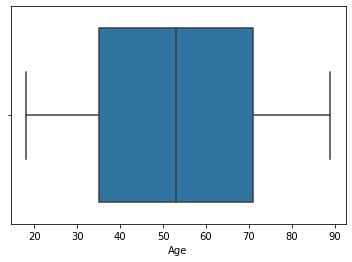

In [17]:
#Boxplot to detect outliers in Age column
sns.boxplot(x='Age', data=churn)

<AxesSubplot:xlabel='Population'>

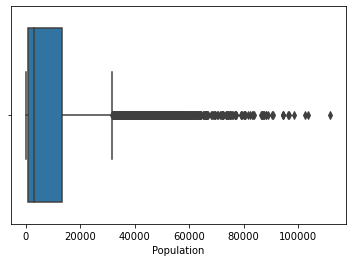

In [18]:
#Detecting Outliers in 'Population' Column
sns.boxplot(x='Population', data=churn)

In [19]:
#gathering largest values
churn.Population.nlargest(n=20)

8139    111850
8320    103732
6288    102433
1775     98660
6610     96575
8130     96436
2402     94512
7441     94512
1893     94395
4349     90675
203      90517
1398     89075
442      88349
5898     88344
6464     87509
9987     87509
1211     87240
157      86926
8079     86811
7454     86703
Name: Population, dtype: int64

In [20]:
#gathering smallest values
churn.Population.nsmallest(n=20)

13      0
422     0
428     0
434     0
446     0
682     0
694     0
719     0
814     0
839     0
904     0
966     0
1091    0
1164    0
1375    0
1422    0
1612    0
2026    0
2086    0
2155    0
Name: Population, dtype: int64

In [21]:
#The zero values in population will be addressed

<AxesSubplot:xlabel='Children'>

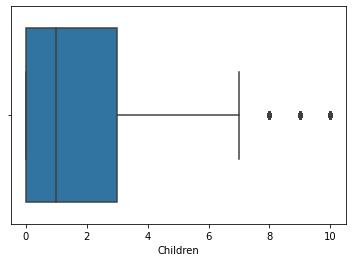

In [22]:
#Detecting Outliers in 'Children' Column
sns.boxplot(x='Children', data=churn)

In [23]:
#Outliers in Children will be addressed

<AxesSubplot:xlabel='Income'>

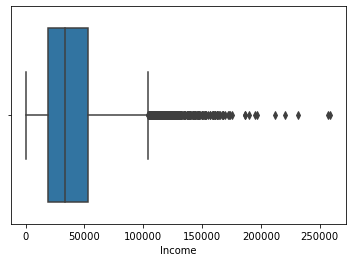

In [24]:
#Detecting Outliers in 'Income' Column
sns.boxplot(x='Income', data=churn)

In [25]:
#gathering largest values
churn.Income.nlargest(n=20)

4249    258900
9180    256998
6649    231252
5599    220383
5801    212255
6594    196746
6837    194550
3985    189938
8830    186156
972     186035
2762    175137
9249    173978
656     172884
3782    172372
685     169580
688     168097
6130    167846
3132    167566
3953    166553
1725    165151
Name: Income, dtype: int64

In [26]:
#Gathering smallest values
churn.Income.nsmallest(n=20)

4502     348
272      368
2051     630
6732     643
6190     644
1896     740
2525     901
4169     938
5461     945
4733     951
5714     954
9313    1050
4627    1055
3649    1062
3534    1109
4419    1143
2183    1179
1418    1193
4387    1193
4902    1263
Name: Income, dtype: int64

In [27]:
#People have different levels of income based on profession. $250k would not be unusual for a doctor or surgeon
#The largest values in the column prove they are not outliers

<AxesSubplot:xlabel='Outage_sec_perweek'>

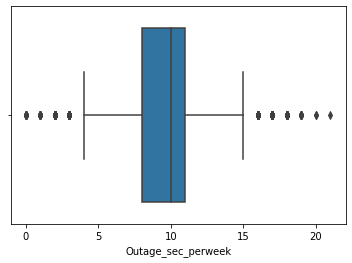

In [28]:
#Detecting Outliers in 'Outage_sec_perweek' Column
sns.boxplot(x='Outage_sec_perweek', data=churn)

In [29]:
#Gathering largest values
churn.Outage_sec_perweek.nlargest(n=20)

4190    21
2927    20
5392    20
527     19
868     19
1022    19
2250    19
4562    19
5363    19
5680    19
7953    19
8539    19
8643    19
8968    19
220     18
438     18
547     18
761     18
1306    18
1496    18
Name: Outage_sec_perweek, dtype: int64

In [30]:
#Outages can vary based on geographical location and weather patterns. retaining

<AxesSubplot:xlabel='Email'>

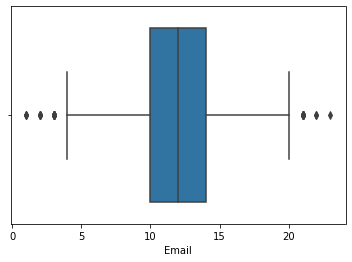

In [31]:
#Detecting Outliers in 'Email' Column
sns.boxplot(x='Email', data=churn)

In [32]:
#Emails include service correspondence and marketing. If a customer has longer tenure, I'd expect less emails. if a customer just opened an account, I'd expect more. Retaining outliers

<AxesSubplot:xlabel='Contacts'>

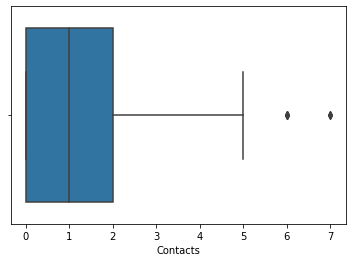

In [33]:
#Detecting Outliers in 'Contacts' Column
sns.boxplot(x='Contacts', data=churn)

In [34]:
#People having technical difficulties would have a higher number of contacts. Retaining outliers

<AxesSubplot:xlabel='Tenure'>

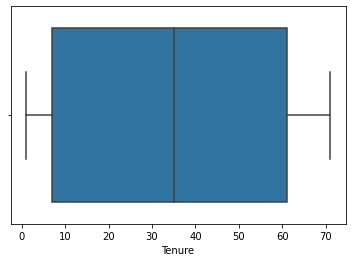

In [35]:
#Detecting outliers in "Tenure" Column
sns.boxplot(x='Tenure', data=churn)

<AxesSubplot:xlabel='MonthlyCharge'>

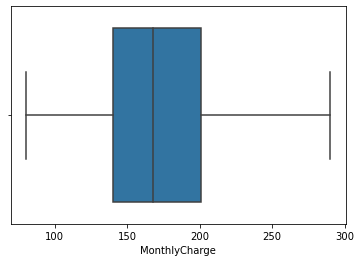

In [36]:
#Detecting Outliers in 'MonthlyCharge' Column
sns.boxplot(x='MonthlyCharge', data=churn)

<AxesSubplot:xlabel='Bandwidth_GB_Year'>

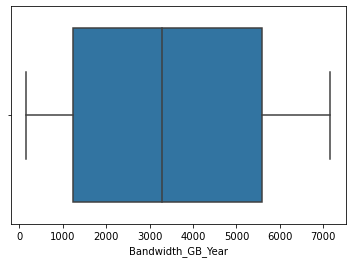

In [37]:
#Detecting Outliers in 'Bandwidth_GB_Year' Column
sns.boxplot(x='Bandwidth_GB_Year', data=churn)

<AxesSubplot:xlabel='Response'>

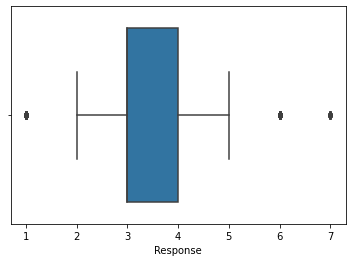

In [38]:
#Detecting Outliers in 'Responses' Column
sns.boxplot(x='Response', data=churn)

<AxesSubplot:xlabel='Fix'>

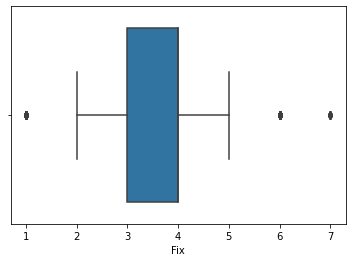

In [39]:
#Detecting Outliers in 'Fix' Column
sns.boxplot(x='Fix', data=churn)

<AxesSubplot:xlabel='Replacement'>

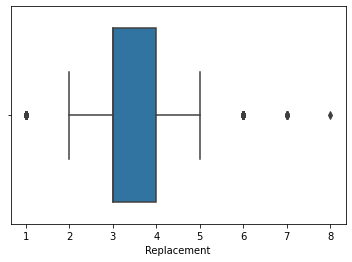

In [40]:
#Detecting Outliers in 'Replacement' Column
sns.boxplot(x='Replacement', data=churn)

<AxesSubplot:xlabel='Reliability'>

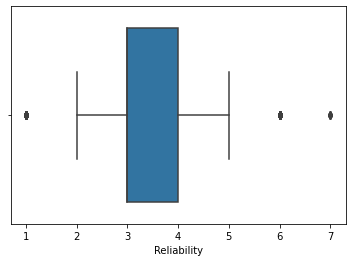

In [41]:
#Detecting Outliers in 'Reliability' Column
sns.boxplot(x='Reliability', data=churn)

<AxesSubplot:xlabel='Options'>

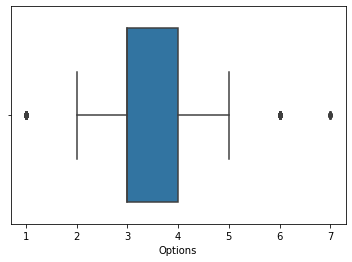

In [42]:
#Detecting Outliers in 'Options' Column
sns.boxplot(x='Options', data=churn)

<AxesSubplot:xlabel='Respectfulness'>

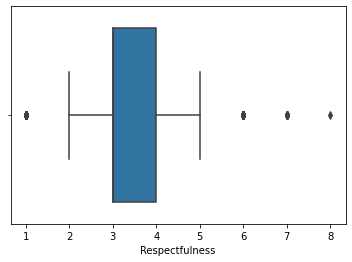

In [43]:
#Detecting Outliers in 'Respectfulness' Column
sns.boxplot(x='Respectfulness', data=churn)

<AxesSubplot:xlabel='Courteous'>

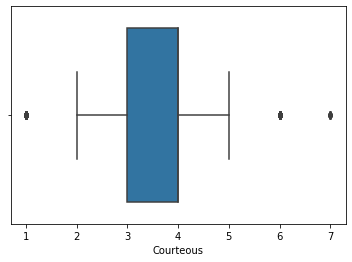

In [44]:
#Detecting Outliers in 'Courteous' Column
sns.boxplot(x='Courteous', data=churn)

<AxesSubplot:xlabel='Listen'>

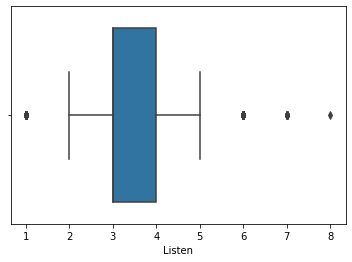

In [45]:
#Detecting Outliers in 'Listen' Column
sns.boxplot(x='Listen', data=churn)

In [46]:
#All outliers in the survey response columns will be retained since they are on a 1-8 scale and customers have different ideas of what constitutes good customer service.

##### Addressing Outliers in Children

(array([2570., 2472., 1495., 1472., 1006.,  212.,  187.,  185.,  210.,
         191.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

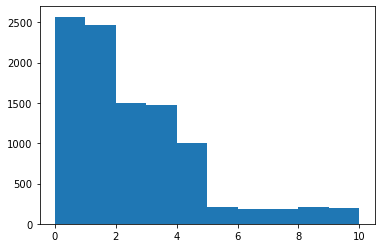

In [47]:
#Histogram of children to observe distribution
plt.hist(churn['Children'])

In [48]:
##New column created, Children Z-Score 

churn['ChildrenZScore']=stats.zscore(churn['Children'])

In [49]:
#Classify outliers in 'Children' as 1 and values within std as 0
churn["ChildrenOutlier"] = (abs(churn["ChildrenZScore"])>3).astype(int)

In [50]:
#Display rows with outliers in 'Children'
churn.loc[churn.ChildrenOutlier == 1]

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Response,Fix,Replacement,Reliability,Options,Respectfulness,Courteous,Listen,ChildrenZScore,ChildrenOutlier
30,31,L357432,79b827eb-46b9-4737-8484-0b670171bc4b,2024dab5fff54350716edea719cb3a9b,Whitesboro,NY,Oneida,13492,43,-75,11268,Urban,America/New_York,Air traffic controller,9,45,43383,Married,Male,No,6,14,0,0,No,Two Year,Yes,No,Fiber Optic,No,No,No,Yes,No,No,Yes,Yes,Yes,Credit Card (automatic),11,230.11,1795,3,2,1,5,3,3,3,2,3.219376,1
97,98,N417817,832e769e-3b90-47cc-8f70-12e77fbd52a2,4886325be93630732220fb84b427c7cd,Beaverville,IL,Iroquois,60912,40,-87,521,Suburban,America/Chicago,"Designer, textile",10,23,64816,Divorced,Male,Yes,5,14,1,1,No,Month-to-month,No,No,Fiber Optic,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Mailed Check,12,187.48,1956,3,2,2,4,3,2,3,2,3.685122,1
144,145,Q541158,f67c47f8-93da-4b90-babe-4cd9b9deebf6,ef10d94adbaa866559d042fc841bc744,Saint Paul,MN,Ramsey,55107,44,-93,15171,Suburban,America/Chicago,Clinical biochemist,10,76,35954,Married,Male,Yes,13,14,1,0,No,Month-to-month,No,No,None,Yes,No,No,Yes,No,No,No,Yes,Yes,Electronic Check,3,137.46,819,4,4,3,3,2,3,4,2,3.685122,1
329,330,T369132,bad7853a-c59b-4775-ad6d-05ff1d14c4b4,7ddea13b733a3edd3cca75a1939474de,Maryville,TN,Blount,37801,35,-84,26381,Urban,America/New_York,Police officer,9,19,40902,Married,Female,Yes,8,8,0,1,No,Month-to-month,Yes,No,None,Yes,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Mailed Check,11,222.68,1973,4,3,4,2,5,3,4,3,3.219376,1
334,335,O402306,c8ffb29f-7ee4-4883-8698-f6936607cd04,cd44dcee7c17a65ba74fee79b97526d9,Salmon,ID,Lemhi,83467,45,-113,5978,Suburban,America/Boise,"Therapist, music",9,79,11179,Never Married,Female,No,10,11,0,0,No,One year,No,Yes,DSL,Yes,Yes,Yes,No,No,No,No,No,Yes,Electronic Check,8,127.48,1451,3,2,2,3,4,4,4,5,3.219376,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9623,9624,Q831134,5b4ad141-b338-4638-9b10-1d0e2ce826b5,7ce5d8d9621aa54f71c403db655705fe,Granada Hills,CA,Los Angeles,91344,34,-118,53266,Urban,America/Los_Angeles,"Engineer, communications",10,79,42222,Married,Female,No,9,14,1,4,No,Month-to-month,Yes,No,DSL,Yes,Yes,No,No,No,Yes,No,Yes,No,Mailed Check,68,172.46,6432,4,5,5,3,5,3,4,2,3.685122,1
9676,9677,P834833,1f80a89f-81fd-47fd-ba1f-df8ecff04708,a10db50fc055056f5886b8f8d76afea0,Greenleaf,WI,Brown,54126,44,-88,3738,Rural,America/Chicago,Tourism officer,9,30,29388,Married,Male,No,9,8,1,1,No,One year,No,Yes,None,Yes,No,No,No,No,Yes,No,Yes,No,Mailed Check,64,127.48,5851,3,2,4,4,2,3,3,2,3.219376,1
9790,9791,U741276,5c3198d1-4138-4ba8-b0b9-652748f0c127,083153f92f7b45bb8e084885d2a6c0b1,Colorado Springs,CO,El Paso,80930,38,-104,1995,Rural,America/Denver,Patent examiner,10,31,23693,Married,Male,No,12,13,0,1,No,One year,Yes,No,Fiber Optic,Yes,No,No,Yes,Yes,No,Yes,Yes,Yes,Electronic Check,71,242.63,6900,3,4,4,3,4,4,4,2,3.685122,1
9871,9872,F573675,71c2c800-8cee-434b-b60a-efa9ecbacf38,6177386284a481a7fee6728b2fda9b02,Holton,IN,Ripley,47023,39,-85,1691,Urban,America/Indiana/Indianapolis,"Horticulturist, amenity",10,18,19351,Widowed,Female,No,7,13,1,1,No,Month-to-month,No,No,DSL,Yes,No,Yes,No,Yes,No,No,Yes,Yes,Electronic Check,64,142.48,6388,3,3,3,3,4,3,4,4,3.685122,1


In [51]:
# Print total numbers of outliers in 'Children'
print("number of outliers = " + str(churn.ChildrenOutlier.value_counts()[1]))

number of outliers = 191


In [52]:
#Outliers in children will be replaced with median due to previously observed skew and large quantity of outliers
# find median of 'Children'
churn['Children'].median()

1.0

In [53]:
#replace outliers of 'Children' with median
churn['Children'].replace([7,8,9,10],1, inplace=True)

<AxesSubplot:xlabel='Children'>

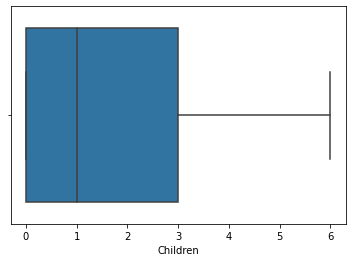

In [54]:
#rechecking children for outliers
sns.boxplot(x='Children', data=churn)

In [55]:
#dropping ChildrenZScore and ChildrenOutlier from dataframe
churn=churn.drop(['ChildrenZScore', 'ChildrenOutlier'], axis=1)

##### Addressing Zero Values in Population

(array([7.243e+03, 1.178e+03, 7.340e+02, 4.610e+02, 2.090e+02, 1.050e+02,
        3.500e+01, 2.400e+01, 8.000e+00, 3.000e+00]),
 array([     0.,  11185.,  22370.,  33555.,  44740.,  55925.,  67110.,
         78295.,  89480., 100665., 111850.]),
 <BarContainer object of 10 artists>)

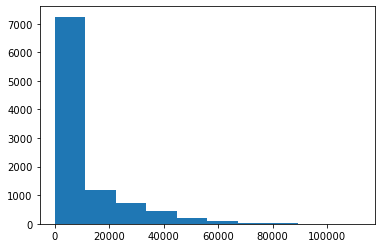

In [56]:
#Checking distribution with histogram
plt.hist(churn['Population'])

In [57]:
#Replace zero value with Population's mean

In [58]:
#Gathering mean of population
churn['Population'].mean()

9756.5624

In [59]:
#Replacing 0s with Population's mean
churn['Population'] = churn['Population'].replace(0, 9757)

(array([7.243e+03, 1.178e+03, 7.340e+02, 4.620e+02, 2.080e+02, 1.050e+02,
        3.500e+01, 2.400e+01, 8.000e+00, 3.000e+00]),
 array([2.000000e+00, 1.118680e+04, 2.237160e+04, 3.355640e+04,
        4.474120e+04, 5.592600e+04, 6.711080e+04, 7.829560e+04,
        8.948040e+04, 1.006652e+05, 1.118500e+05]),
 <BarContainer object of 10 artists>)

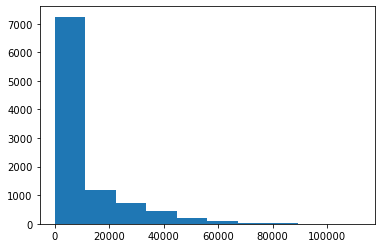

In [60]:
plt.hist(churn['Population'])

# C2. Summary Statistics & Value Counts

Next, I used Pandas’ describe function to call the statistics for each variable. The describe function displays the total number of rows in a column as the count. Following the count was the mean, or average. The mean is calculated by adding all the values of the column together and dividing that by the total number of rows in the column. Below the mean is the standard deviation. The standard deviation informs the reader how far each value is from the average or mean. The minimum is listed after the standard deviation. It is the lowest value in the column. Next is the 25th percentile value. Twenty-five percent of all the data are equal to or less than the number reported in the 25th percentile. The 50th percentile is also known as the median. It is the middle value in the column when the numbers are ordered from least to greatest, with half the data less than the value of the median and half of the data greater than the median, The 75th percentile number indicates 75% of the values in the column are less than this number while 25% are greater than this number. Lastly, the max number is the highest value in the column.

Summary statistics are only performed on numeric variables. To gain more insight into categorical variables, I used Pandas’ value counts function to return the total occurrences of each category in the column. This data can be used to calculate the percentages of each category within a column. 

In [61]:
#Value counts for OnlineSecurity
churn.value_counts('OnlineSecurity')

OnlineSecurity
No     6424
Yes    3576
dtype: int64

64% of customers have an online security add-on. 36% of TELEMONOP customers do not have a subscription for online security through TELEMONOP.

In [62]:
#Summary statistics for Age
churn.Age.describe()

count    10000.000000
mean        53.078400
std         20.698882
min         18.000000
25%         35.000000
50%         53.000000
75%         71.000000
max         89.000000
Name: Age, dtype: float64

The age of TELEMONOP’s customers ranges from 18 to 89 years of age. The average customer age is 53 years old.

In [63]:
#Summary statistics for Children
churn.Children.describe()

count    10000.00000
mean         1.66700
std          1.50424
min          0.00000
25%          0.00000
50%          1.00000
75%          3.00000
max          6.00000
Name: Children, dtype: float64

This data represents the total number of children living in the customer’s residence. The average customer has two children. Some of TELEMONOP’s customers are childless while the largest household reported six children.

In [64]:
#Summary statistics for Income
churn.Income.describe()

count     10000.000000
mean      39806.433300
std       28199.927051
min         348.000000
25%       19224.000000
50%       33170.000000
75%       53245.500000
max      258900.000000
Name: Income, dtype: float64

Income represents the annual income of the account holder. The average TELEMONOP customer earns $39,806 a year. The lowest reported annual income is $348 while the highest is $258,900. This is a large spread, but this is expected as TELEMONOP provides service across the United States to people of different income levels. Someone living in an urban area would require a higher income than someone living in a rural area, for example.

In [65]:
#Value counts for Marital
churn.value_counts('Marital')

Marital
Divorced         2092
Widowed          2027
Separated        2014
Never Married    1956
Married          1911
dtype: int64

The Marital column data represents the marital status of TELEMONOP customers. Each marital status has a relatively even distribution. The highest percentage of customers are divorced at 21% while the lowest percentage of customers are married at 19%

In [66]:
#Value counts for Gender
churn.value_counts('Gender')

Gender
Female       5025
Male         4744
Nonbinary     231
dtype: int64

The Gender column represents the gender identity of TELEMONOP customers. The largest gender demographic is female at 50% of the account holders. The smallest gender demographic is nonbinary at 2%.

In [67]:
#Value counts for Area
churn.value_counts('Area')

Area
Suburban    3346
Rural       3327
Urban       3327
dtype: int64

Area represents the type of area where the customer resides. While all three categories are almost evenly distributed, TELEMONOP has the most customers in suburban areas.

In [68]:
#Value counts for Techie
churn.value_counts('Techie')

Techie
No     8321
Yes    1679
dtype: int64

Do TELEMONOP customers consider themselves good with technology? Only 17% consider themselves adept at dealing with technology while 83% do not think they are good with technology.

In [69]:
#Value counts for InternetService
churn.value_counts('InternetService')

InternetService
Fiber Optic    4408
DSL            3463
None           2129
dtype: int64

Internet Service represents the type of internet service each customer has from TELEMONOP. Most customers have fiber optic internet at 44%, followed by DSL internet service at 35%. 21% of customers have no internet service with TELEMONOP.

In [70]:
#Value counts for Port_modem
churn.value_counts('Port_modem')

Port_modem
No     5166
Yes    4834
dtype: int64

Do customers have a portable modem? 48% of customers are leasing a portable from TELEMONOP while 52% of customers do not have a portable modem.

In [71]:
#Value counts for Tablet
churn.value_counts('Tablet')

Tablet
No     7009
Yes    2991
dtype: int64

Only 30% of TELEMONOP customers own a tablet. 70% of customers do not own a tablet.

In [72]:
#Value counts for Phone
churn.value_counts('Phone')

Phone
Yes    9067
No      933
dtype: int64

91% of customers have phone service through TELEMONOP while 30% do not have phone service.

In [73]:
#Value counts for Multiple
churn.value_counts('Multiple')

Multiple
No     5392
Yes    4608
dtype: int64

54% of TELEMONOP customers have more than one phone or internet line. 46% of customers have one line or no lines with TELEMONOP.

In [74]:
#Value counts for OnlineBackup
churn.value_counts('OnlineBackup')

OnlineBackup
No     5494
Yes    4506
dtype: int64

55% of customers have an online cloud back up account through TELEMONOP. 45% of customers do not have an online cloud account.

In [75]:
#Value counts for DeviceProtection
churn.value_counts('DeviceProtection')

DeviceProtection
No     5614
Yes    4386
dtype: int64

44% of TELEMONOP customers have a device protection plan. 57% of customers do not have an online protection plan.

In [76]:
#Value counts for TechSupport
churn.value_counts('TechSupport')

TechSupport
No     6250
Yes    3750
dtype: int64

38% of customers have a tech support plan through TELEMONOP. 62% of customers do not have a tech support plan. 

In [77]:
#Value counts for StreamingTV
churn.value_counts('StreamingTV')

StreamingTV
No     5071
Yes    4929
dtype: int64

49% of customers stream television shows through TELEMONOP. 51% of customers do not stream television shows.

In [78]:
#Value counts for StreamingMovies
churn.value_counts('StreamingMovies')

StreamingMovies
No     5110
Yes    4890
dtype: int64

49% of customers stream movies through TELEMONOP. 51% of customers do not stream movies. 

# C4. Visualizations

##### OnlineSecurity - Target Variable

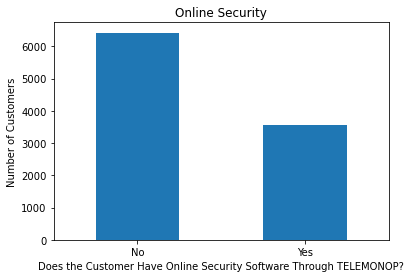

In [79]:
#Univariate
churn.groupby('OnlineSecurity').size().plot.bar(rot=0)
plt.xlabel('Does the Customer Have Online Security Software Through TELEMONOP?')
plt.ylabel('Number of Customers')
plt.title('Online Security')
plt.show()

More customers have not signed up for the online security add compared to those that have signed up for it.

##### Age

Text(0.5, 1.0, 'Age of Customers')

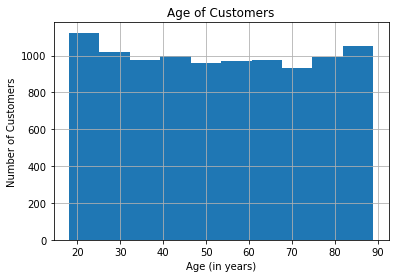

In [80]:
#Univariate
churn.hist('Age')
plt.xlabel('Age (in years)')
plt.ylabel('Number of Customers')
plt.title('Age of Customers')

Customers between the ages of 60-70 have the most subscriptions for online security.

Text(0, 0.5, 'Number of Customers')

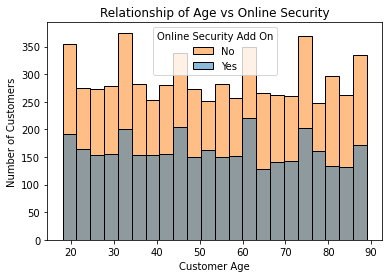

In [81]:
#Bivariate with OnlineSecurity

plt.title("Relationship of Age vs Online Security")
sns.histplot(data = churn, x="Age", hue="OnlineSecurity")
plt.legend(title="Online Security Add On", labels=["No", "Yes"])
plt.xlabel("Customer Age")
plt.ylabel("Number of Customers")

Customers between the ages of 60-70 have the most subscriptions for online security

##### Children

Text(0.5, 1.0, 'Children')

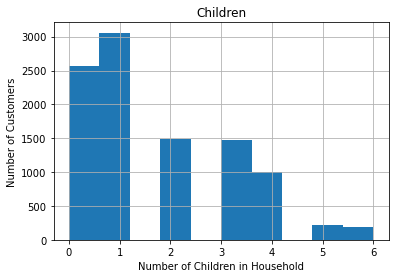

In [83]:
#Univariate
churn.hist('Children')
plt.xlabel('Number of Children in Household')
plt.ylabel('Number of Customers')
plt.title('Children')

Customers without children are slightly more likely to purchase the online security add on.

Text(0, 0.5, 'Count of Customers')

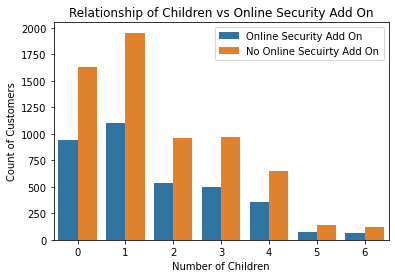

In [84]:
#Bivariate with OnlineSecuirty
sns.countplot(data = churn, x="Children", hue="OnlineSecurity")
plt.title("Relationship of Children vs Online Security Add On")
plt.legend(["Online Security Add On", "No Online Secuirty Add On"])
plt.xlabel("Number of Children")
plt.ylabel("Count of Customers")

Children does not seem a strong predictor for if a customer will purchase an online security add on.

##### Income

Text(0.5, 1.0, 'Annual Income')

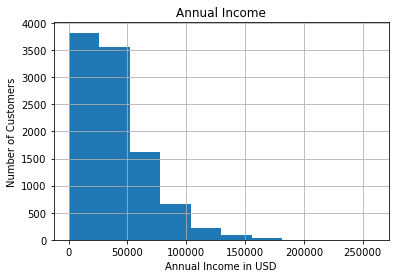

In [86]:
#Univariate
churn.hist('Income')
plt.xlabel('Annual Income in USD')
plt.ylabel('Number of Customers')
plt.title('Annual Income')

Text(0, 0.5, 'Number of Customers')

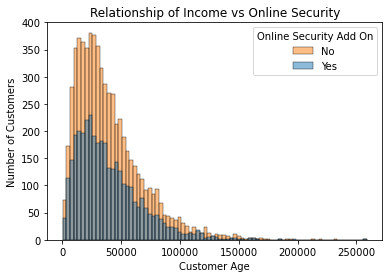

In [87]:
#Bivariate with OnlineSecurity
plt.title("Relationship of Income vs Online Security")
sns.histplot(data = churn, x="Income", hue="OnlineSecurity")
plt.legend(title="Online Security Add On", labels=["No", "Yes"])
plt.xlabel("Customer Age")
plt.ylabel("Number of Customers")

A large amount of customers who earn $20,000 -$25,000 purchased the online security add on

##### Marital

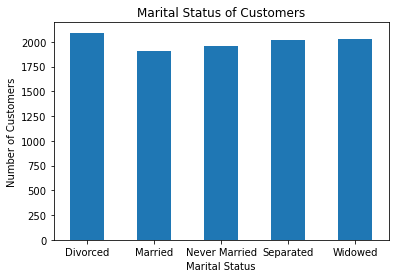

In [89]:
#Univariate

churn.groupby('Marital').size().plot.bar(rot=0)
plt.xlabel('Marital Status')
plt.ylabel('Number of Customers')
plt.title('Marital Status of Customers')
plt.show()

Text(0, 0.5, 'Number of Customers')

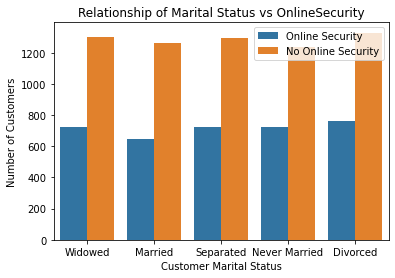

In [90]:
#Bivariate with OnlineSecurity
sns.countplot(data = churn, x="Marital", hue="OnlineSecurity")
plt.title("Relationship of Marital Status vs OnlineSecurity")
plt.legend(["Online Security", "No Online Security"])
plt.xlabel("Customer Marital Status")
plt.ylabel("Number of Customers")

Marital status does not seem a strong predictor for if a customer will purchase an online security add on.

##### Gender

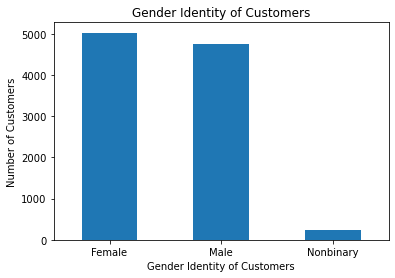

In [92]:
#Univariate

churn.groupby('Gender').size().plot.bar(rot=0)
plt.xlabel('Gender Identity of Customers')
plt.ylabel('Number of Customers')
plt.title('Gender Identity of Customers')
plt.show()

Text(0, 0.5, 'Number of Customers')

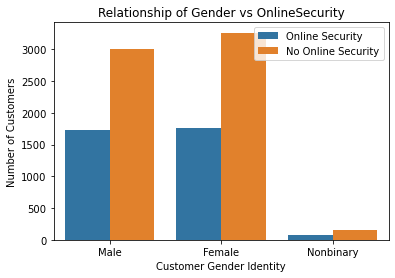

In [93]:
#Bivariate with OnlineSecurity

sns.countplot(data = churn, x="Gender", hue="OnlineSecurity")
plt.title("Relationship of Gender vs OnlineSecurity")
plt.legend(["Online Security", "No Online Security"])
plt.xlabel("Customer Gender Identity")
plt.ylabel("Number of Customers")

Males are the most likey to purchase the online scurity add on.

##### Area

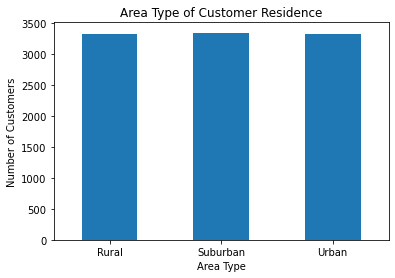

In [95]:
#Univariate
churn.groupby('Area').size().plot.bar(rot=0)
plt.xlabel('Area Type')
plt.ylabel('Number of Customers')
plt.title('Area Type of Customer Residence')
plt.show()

Text(0, 0.5, 'Number of Customers')

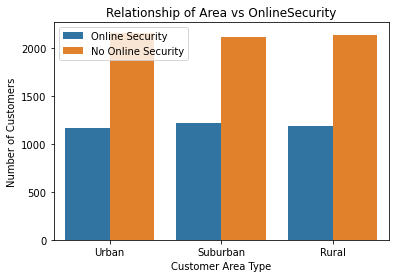

In [96]:
#Bivariate with OnlineSecurity

sns.countplot(data = churn, x="Area", hue="OnlineSecurity")
plt.title("Relationship of Area vs OnlineSecurity")
plt.legend(["Online Security", "No Online Security"])
plt.xlabel("Customer Area Type")
plt.ylabel("Number of Customers")

Area type does not seem a strong predictor for if a customer will purchase an online security add on.

##### Techie

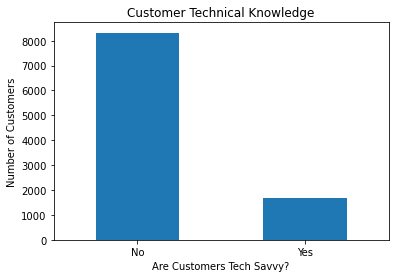

In [98]:
#Univariate
churn.groupby('Techie').size().plot.bar(rot=0)
plt.xlabel('Are Customers Tech Savvy?')
plt.ylabel('Number of Customers')
plt.title('Customer Technical Knowledge')
plt.show()

Text(0, 0.5, 'Number of Customers')

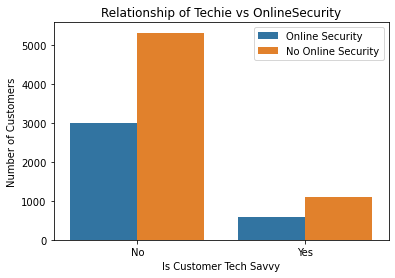

In [99]:
#Bivariate with OnlineSecurity
sns.countplot(data = churn, x="Techie", hue="OnlineSecurity")
plt.title("Relationship of Techie vs OnlineSecurity")
plt.legend(["Online Security", "No Online Security"])
plt.xlabel("Is Customer Tech Savvy")
plt.ylabel("Number of Customers")

Being Tech savvy does not seem a strong predictor for if a customer will purchase an online security add on.

##### InternetService

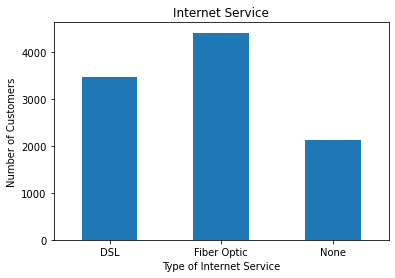

In [101]:
#Univariate
churn.groupby('InternetService').size().plot.bar(rot=0)
plt.xlabel('Type of Internet Service')
plt.ylabel('Number of Customers')
plt.title('Internet Service')
plt.show()

Text(0, 0.5, 'Number of Customers')

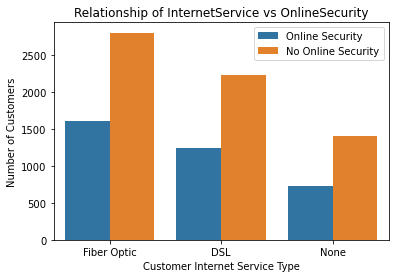

In [102]:
#Bivariate with OnlineSecurity
sns.countplot(data = churn, x="InternetService", hue="OnlineSecurity")
plt.title("Relationship of InternetService vs OnlineSecurity")
plt.legend(["Online Security", "No Online Security"])
plt.xlabel("Customer Internet Service Type")
plt.ylabel("Number of Customers")

InternetService type does not seem a strong predictor for if a customer will purchase an online security add on.

##### Tablet

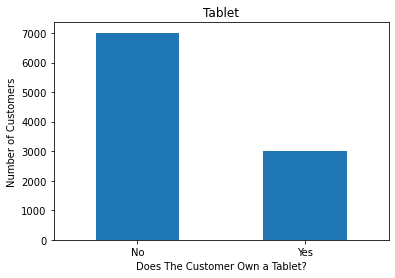

In [104]:
#Univariate
churn.groupby('Tablet').size().plot.bar(rot=0)
plt.xlabel('Does The Customer Own a Tablet?')
plt.ylabel('Number of Customers')
plt.title('Tablet')
plt.show()

Text(0, 0.5, 'Number of Customers')

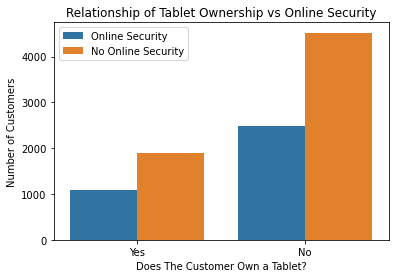

In [105]:
#Bivariate with OnlineSecurity
sns.countplot(data=churn, x="Tablet", hue='OnlineSecurity')
plt.title("Relationship of Tablet Ownership vs Online Security")
plt.legend(["Online Security", "No Online Security"])
plt.xlabel("Does The Customer Own a Tablet?")
plt.ylabel("Number of Customers")

Tablet does not seem a strong predictor for if a customer will purchase an online security add on.

##### Port_modem

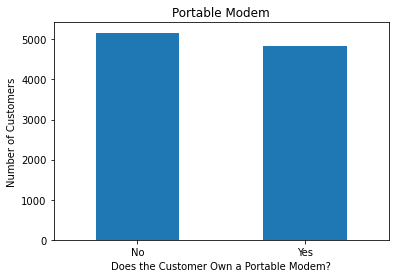

In [107]:
#Univariate
churn.groupby('Port_modem').size().plot.bar(rot=0)
plt.xlabel('Does the Customer Own a Portable Modem?')
plt.ylabel('Number of Customers')
plt.title('Portable Modem')
plt.show()

Text(0, 0.5, 'Number of Customers')

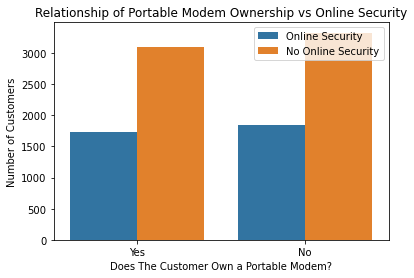

In [108]:
#Bivariate with OnlineSecurity
sns.countplot(data=churn, x="Port_modem", hue='OnlineSecurity')
plt.title("Relationship of Portable Modem Ownership vs Online Security")
plt.legend(["Online Security", "No Online Security"])
plt.xlabel("Does The Customer Own a Portable Modem?")
plt.ylabel("Number of Customers")

Portable modem ownership does not seem a strong predictor for if a customer will purchase an online security add on.

##### Phone

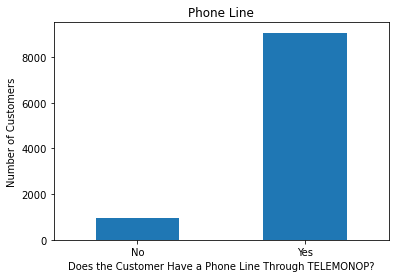

In [110]:
#Univariate
churn.groupby('Phone').size().plot.bar(rot=0)
plt.xlabel('Does the Customer Have a Phone Line Through TELEMONOP?')
plt.ylabel('Number of Customers')
plt.title('Phone Line')
plt.show()

Text(0, 0.5, 'Number of Customers')

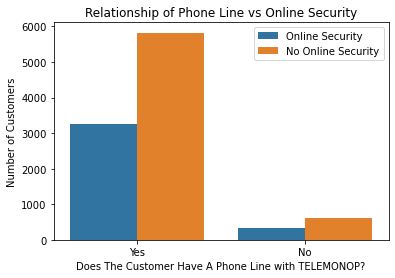

In [111]:
#Bivariate with OnlineSecurity
sns.countplot(data=churn, x="Phone", hue='OnlineSecurity')
plt.title("Relationship of Phone Line vs Online Security")
plt.legend(["Online Security", "No Online Security"])
plt.xlabel("Does The Customer Have A Phone Line with TELEMONOP?")
plt.ylabel("Number of Customers")

Having a single phone line does not seem a strong predictor for if a customer will purchase an online security add on.

##### Multiple

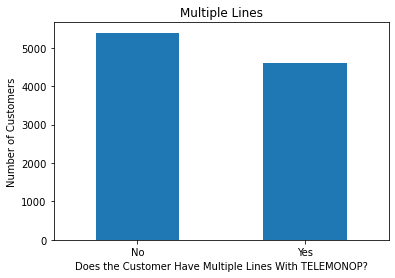

In [113]:
#Univariate
churn.groupby('Multiple').size().plot.bar(rot=0)
plt.xlabel('Does the Customer Have Multiple Lines With TELEMONOP?')
plt.ylabel('Number of Customers')
plt.title('Multiple Lines')
plt.show()

Text(0, 0.5, 'Number of Customers')

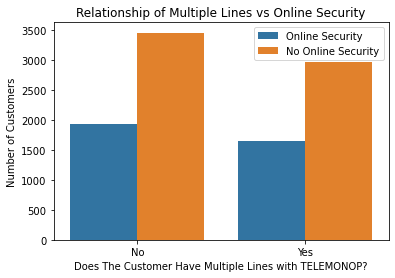

In [114]:
#Bivariate with OnlineSecurity
sns.countplot(data=churn, x="Multiple", hue='OnlineSecurity')
plt.title("Relationship of Multiple Lines vs Online Security")
plt.legend(["Online Security", "No Online Security"])
plt.xlabel("Does The Customer Have Multiple Lines with TELEMONOP?")
plt.ylabel("Number of Customers")

Having multiple phone lines does not seem a strong predictor for if a customer will purchase an online security add on.

##### OnlineBackup

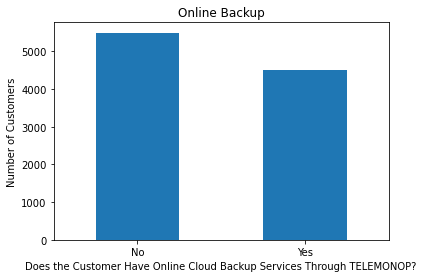

In [116]:
#Univariate
churn.groupby('OnlineBackup').size().plot.bar(rot=0)
plt.xlabel('Does the Customer Have Online Cloud Backup Services Through TELEMONOP?')
plt.ylabel('Number of Customers')
plt.title('Online Backup')
plt.show()

Text(0, 0.5, 'Number of Customers')

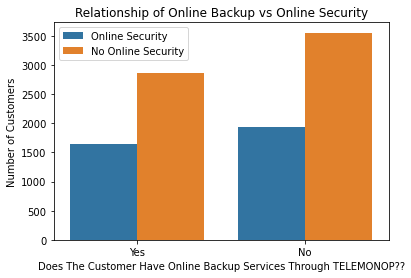

In [117]:
#Bivariate with OnlineSecurity
sns.countplot(data=churn, x="OnlineBackup", hue='OnlineSecurity')
plt.title("Relationship of Online Backup vs Online Security")
plt.legend(["Online Security", "No Online Security"])
plt.xlabel("Does The Customer Have Online Backup Services Through TELEMONOP??")
plt.ylabel("Number of Customers")

Customers who have online back up services are more likely to purchase an online security add on  

##### DeviceProtection

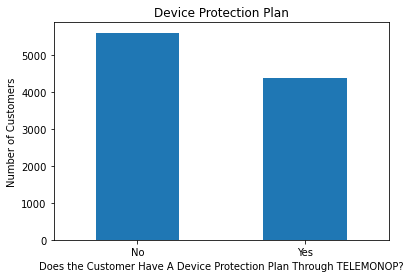

In [119]:
#Univariate
churn.groupby('DeviceProtection').size().plot.bar(rot=0)
plt.xlabel('Does the Customer Have A Device Protection Plan Through TELEMONOP?')
plt.ylabel('Number of Customers')
plt.title('Device Protection Plan')
plt.show()

Text(0, 0.5, 'Number of Customers')

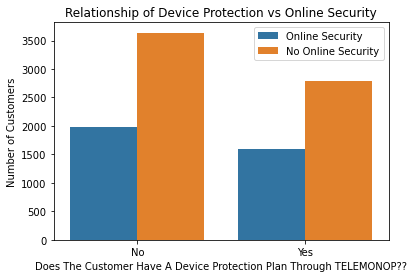

In [120]:
#Bivariate with OnlineSecurity
sns.countplot(data=churn, x="DeviceProtection", hue='OnlineSecurity')
plt.title("Relationship of Device Protection vs Online Security")
plt.legend(["Online Security", "No Online Security"])
plt.xlabel("Does The Customer Have A Device Protection Plan Through TELEMONOP??")
plt.ylabel("Number of Customers")

Device Protection does not seem a strong predictor for if a customer will purchase an online security add on.

##### TechSupport

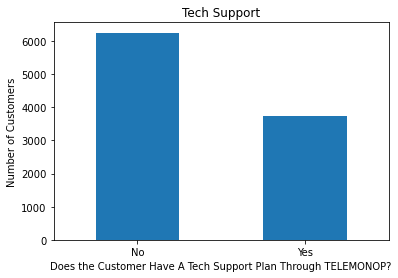

In [122]:
#Univariate
churn.groupby('TechSupport').size().plot.bar(rot=0)
plt.xlabel('Does the Customer Have A Tech Support Plan Through TELEMONOP?')
plt.ylabel('Number of Customers')
plt.title('Tech Support')
plt.show()

Text(0, 0.5, 'Number of Customers')

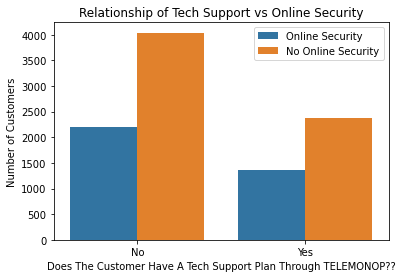

In [123]:
#Bivariate with OnlineSecurity
sns.countplot(data=churn, x="TechSupport", hue='OnlineSecurity')
plt.title("Relationship of Tech Support vs Online Security")
plt.legend(["Online Security", "No Online Security"])
plt.xlabel("Does The Customer Have A Tech Support Plan Through TELEMONOP??")
plt.ylabel("Number of Customers")

Customers who have a tech support plan are more likely to sign up for the online security add on

##### StreamingTV

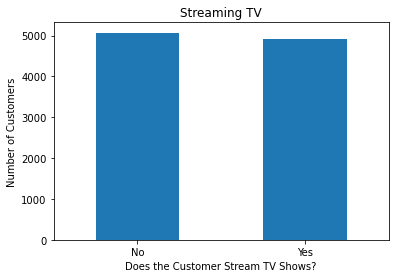

In [125]:
#Univariate
churn.groupby('StreamingTV').size().plot.bar(rot=0)
plt.xlabel('Does the Customer Stream TV Shows?')
plt.ylabel('Number of Customers')
plt.title('Streaming TV')
plt.show()

Text(0, 0.5, 'Number of Customers')

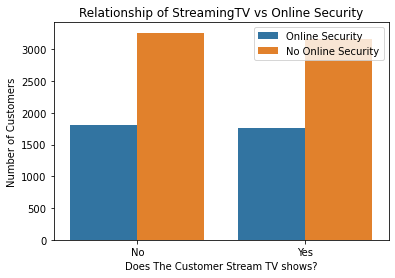

In [126]:
#Bivariate with OnlineSecurity
sns.countplot(data=churn, x="StreamingTV", hue='OnlineSecurity')
plt.title("Relationship of StreamingTV vs Online Security")
plt.legend(["Online Security", "No Online Security"])
plt.xlabel("Does The Customer Stream TV shows?")
plt.ylabel("Number of Customers")

Streaming TV does not seem a strong predictor for if a customer will purchase an online security add on.

##### StreamingMovies

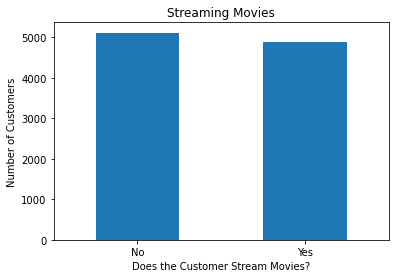

In [128]:
#Univariate
churn.groupby('StreamingMovies').size().plot.bar(rot=0)
plt.xlabel('Does the Customer Stream Movies?')
plt.ylabel('Number of Customers')
plt.title('Streaming Movies')
plt.show()

Text(0, 0.5, 'Number of Customers')

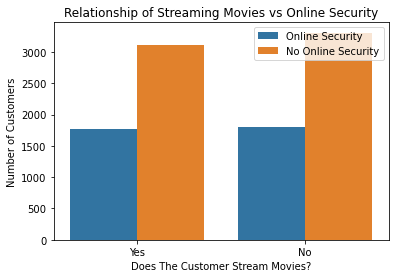

In [129]:
#Bivariate with Tenure
sns.countplot(data=churn, x="StreamingMovies", hue='OnlineSecurity')
plt.title("Relationship of Streaming Movies vs Online Security")
plt.legend(["Online Security", "No Online Security"])
plt.xlabel("Does The Customer Stream Movies?")
plt.ylabel("Number of Customers")

Streaming movies does not seem a strong predictor for if a customer will purchase an online security add on.

# C3. Data Wrangling

Like data cleaning, my data wrangling steps were very similar to what I did in D208 Task 1. I dropped unneeded columns, used ordinal encoding to re-express categorical columns with binary “yes/no” data values, and re-expressed nominal categorical values with one hot encoding. After renaming the new columns created through one-hot encoding, I finally joined the new columns into the churn data set. I then created a new data frame containing the columns that were used in the regression model named “lr_churn”. 

### Dropping Columns

First, I dropped the City, State, TimeZone, County, and Job, columns from the churn data set using Pandas drop column function. These nominal categorical data columns contain copious amounts of unique features that would drastically increase the dimensionality of the data set and could throw off the logistic regression model. 

I also dropped the CaseOrder, Customer_id, Interaction, UID, since they do not contain information about TELEMONOP services. Zip, Lat, Lng, and Population columns were redundant since I used Area for customer location data.

In [131]:
#Dropping unnecessary columns that would increase dimensionality of data
churn=churn.drop(columns=['CaseOrder',
                         'Customer_id',
                         'Interaction',
                         'UID',
                          'City',
                          'State',
                          'County',
                         'Zip',
                         'Lat',
                         'Lng',
                         'Population',
                         'TimeZone'])


In [132]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 38 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Area                  10000 non-null  object 
 1   Job                   10000 non-null  object 
 2   Children              10000 non-null  int64  
 3   Age                   10000 non-null  int64  
 4   Income                10000 non-null  int64  
 5   Marital               10000 non-null  object 
 6   Gender                10000 non-null  object 
 7   Churn                 10000 non-null  object 
 8   Outage_sec_perweek    10000 non-null  int64  
 9   Email                 10000 non-null  int64  
 10  Contacts              10000 non-null  int64  
 11  Yearly_equip_failure  10000 non-null  int64  
 12  Techie                10000 non-null  object 
 13  Contract              10000 non-null  object 
 14  Port_modem            10000 non-null  object 
 15  Tablet              

### Ordinal Encoding "Yes/No" Binary Variables 

Next, I used ordinal encoding to re-express the ordinal categorical data columns with Yes or No data values. Ordinal data includes categorical data that has an inherent order. Examples include grading scales, military ranks, and education levels (Beacom, 2019). Ordinal encoding assigns a number to each rank. For example, to use ordinal encoding on education levels, primary school would be assigned a 1, middle school would be assigned a 2, high school would be assigned a 3, and college would be assigned a 4. Ordinal encoding can also be used on “Yes/No” or “True/False” data. 

I used Python’s replace function to replace Yes values with 1 and No values with zero in the Churn, Techie, Port_Modem, Tablet, Phone, Multiple, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, and PaperlessBilling columns. I included all the previously listed columns except PaperlessBilling model because they contain data about services TELEMONOP offers. If one of these services are correlated with longer tenure, TELEMONOP can offer promotions for them in their upcoming marketing campaign.

In [134]:
churn.Churn.replace(('Yes', 'No'), (1, 0), inplace=True)

In [135]:
churn.Techie.replace(('Yes', 'No'), (1, 0), inplace=True)

In [136]:
churn.Port_modem.replace(('Yes', 'No'), (1, 0), inplace=True)

In [137]:
churn.Tablet.replace(('Yes', 'No'), (1, 0), inplace=True)

In [138]:
churn.Phone.replace(('Yes', 'No'), (1, 0), inplace=True)

In [139]:
churn.Multiple.replace(('Yes', 'No'), (1, 0), inplace=True)

In [140]:
churn.OnlineSecurity.replace(('Yes', 'No'), (1, 0), inplace=True)

In [141]:
churn.OnlineBackup.replace(('Yes', 'No'), (1, 0), inplace=True)

In [142]:
churn.DeviceProtection.replace(('Yes', 'No'), (1, 0), inplace=True)

In [143]:
churn.TechSupport.replace(('Yes', 'No'), (1, 0), inplace=True)

In [144]:
churn.StreamingTV.replace(('Yes', 'No'), (1, 0), inplace=True)

In [145]:
churn.StreamingMovies.replace(('Yes', 'No'), (1, 0), inplace=True)

In [146]:
churn.PaperlessBilling.replace(('Yes', 'No'), (1, 0), inplace=True)

In [147]:
print(churn)

          Area                                Job  Children  Age  Income  \
0        Urban  Environmental health practitioner         0   68   28561   
1        Urban             Programmer, multimedia         1   27   21704   
2        Urban            Chief Financial Officer         4   50    9609   
3     Suburban                          Solicitor         1   48   18925   
4     Suburban                Medical illustrator         0   83   40074   
...        ...                                ...       ...  ...     ...   
9995     Rural    Sport and exercise psychologist         3   23   55723   
9996     Rural          Consulting civil engineer         4   48   34129   
9997     Rural       IT technical support officer         1   48   45983   
9998     Urban                     Water engineer         1   39   16667   
9999     Urban                 Personal assistant         1   28    9020   

            Marital  Gender  Churn  Outage_sec_perweek  Email  Contacts  \
0           

### One-Hot Encoding Columns With Nominal Data and Renaming The Resulting Columns

Categorical values with nominal data can be converted to numeric data that can be utilized in regression models through one-hot encoding. Nominal categorical data includes data with category names, but no inherent order (Beacom, 2019). Examples include gender, marital status, color, or city names. I chose to use one-hot encoding because it creates a new column for each feature within the original categorical column and assigns either a one or a zero depending on if that feature was present in a specific row of data. One of the feature columns is automatically dropped to reduce multicollinearity in the regression model. The user is still able to determine if the dropped feature applies to the row if all other feature columns contain zeros.

Let us say the Area column was re-expressed to numeric data. Feature columns would be created for urban area and suburban area, and rural area. The urban column is dropped. If the user is viewing a row of data that represents a customer who lives in an urban area, they would see zeros in the SuburbanArea and RuralArea columns. This communicates the customer lived in an urban area. 

One hot encoding was performed using Pandas’ get dummies function. This function created a new data frame with individual columns for each feature from the original column in the churn dataset and converted the data to binary code. It also automatically dropped one feature column.

After creating the new data frame, I renamed the columns to remove spaces and to provide clarity to column names with pandas renaming function. For example, the “Credit Card” column in the new data frame created from the PaymentMethod column in the original churn data set was renamed to “PaymentCreditCard” to show that Credit Card was referring to the payment method. Finally, I joined the newly created and renamed feature columns from the temporary data frames to the churn data set using pandas concat join tool.

In [148]:
#Generating columns of dummy values for Churn's Gender column and renaming the new columns
gender_tempdf = pd.get_dummies(data=churn["Gender"], drop_first=True)

In [149]:
#renaming the dummy Gender columns for clarity and to remove any spaces
gender_tempdf = gender_tempdf.rename(columns={'Male': 'GenderMale', 'Nonbinary' : 'GenderNonbinary'})
gender_tempdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   GenderMale       10000 non-null  uint8
 1   GenderNonbinary  10000 non-null  uint8
dtypes: uint8(2)
memory usage: 19.7 KB


In [150]:
#Generating columns of dummy values for Churn's Marital column
marital_tempdf = pd.get_dummies(data=churn["Marital"], drop_first=True)

In [151]:
#renaming the dummy Marital columns for clarity and to remove any spaces
marital_tempdf = marital_tempdf.rename(columns={'Never Married': 'NeverMarried'})
marital_tempdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Married       10000 non-null  uint8
 1   NeverMarried  10000 non-null  uint8
 2   Separated     10000 non-null  uint8
 3   Widowed       10000 non-null  uint8
dtypes: uint8(4)
memory usage: 39.2 KB


In [152]:
#Generating columns of dummy values for Churn's Area column
area_tempdf = pd.get_dummies(data=churn["Area"], drop_first=True)

In [153]:
#renaming the dummy Area columns for clarity and to remove any spaces
area_tempdf = area_tempdf.rename(columns={'Suburban': 'AreaSuburban', 'Urban': 'AreaUrban'})
area_tempdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   AreaSuburban  10000 non-null  uint8
 1   AreaUrban     10000 non-null  uint8
dtypes: uint8(2)
memory usage: 19.7 KB


In [154]:
#Generating columns of dummy values for churn's PaymentMethod column
paymentmethod_tempdf = pd.get_dummies(data=churn["PaymentMethod"], drop_first=True)

In [155]:
#renaming the dummy PaymentMethod columns for clarity and to remove any spaces
paymentmethod_tempdf = paymentmethod_tempdf.rename(columns={'Credit Card (automatic)': 'PaymentCreditCard', 
                                                            'Electronic Check': 'PaymentElectronicCheck', 
                                                            'Mailed Check': 'PaymentMailedCheck'})
paymentmethod_tempdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   PaymentCreditCard       10000 non-null  uint8
 1   PaymentElectronicCheck  10000 non-null  uint8
 2   PaymentMailedCheck      10000 non-null  uint8
dtypes: uint8(3)
memory usage: 29.4 KB


In [156]:
#Generating columns of dummy values for churn's Contract column
contract_tempdf = pd.get_dummies(data=churn["Contract"], drop_first=True)

In [157]:
#renaming the dummy Contract columns for clarity and to remove any spaces
contract_tempdf = contract_tempdf.rename(columns={'One year': 'ContractOneYear', 'Two Year': 'ContractTwoYear'})
contract_tempdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ContractOneYear  10000 non-null  uint8
 1   ContractTwoYear  10000 non-null  uint8
dtypes: uint8(2)
memory usage: 19.7 KB


In [158]:
#Generating columns of dummy values for churn's InternetService column
internetservice_tempdf = pd.get_dummies(data=churn["InternetService"], drop_first=True)

In [159]:
#Renaming dummy InternetService columns for clarity and to remove spaces
internetservice_tempdf = internetservice_tempdf.rename(columns={'Fiber Optic': 'InternetFiberOptic', 'None': 'InternetNone'})
internetservice_tempdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   InternetFiberOptic  10000 non-null  uint8
 1   InternetNone        10000 non-null  uint8
dtypes: uint8(2)
memory usage: 19.7 KB


In [160]:
 #Generating columns of dummy values for churn's PaymentMethod column
paymentmethod_tempdf = pd.get_dummies(data=churn["PaymentMethod"], drop_first=True)

In [161]:
#Renaming dummy PaymentMethod columns for clarity and to remove spaces
paymentmethod_tempdf = paymentmethod_tempdf.rename(columns={'Credit Card (automatic)': 'PaymentCreditCard', 'Electronic Check': 'PaymentElectronicCheck', 'Mailed Check' : 'PaymentMailedCheck'})
paymentmethod_tempdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   PaymentCreditCard       10000 non-null  uint8
 1   PaymentElectronicCheck  10000 non-null  uint8
 2   PaymentMailedCheck      10000 non-null  uint8
dtypes: uint8(3)
memory usage: 29.4 KB


### Joining Dummy Dataframe Columns With churn Dataset

###### Joining dummy columns for Area (AreaSuburban, AreaUrban)

In [162]:
#Joining AreaSuburban
AreaSuburban = area_tempdf["AreaSuburban"]
churn = pd.concat([churn,AreaSuburban], axis = 1)
churn

,Area,Job,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Response,Fix,Replacement,Reliability,Options,Respectfulness,Courteous,Listen,AreaSuburban
0,Urban,Environmental health practitioner,0,68,28561,Widowed,Male,0,7,10,0,1,0,One year,1,1,Fiber Optic,1,0,1,1,0,0,0,1,1,Credit Card (automatic),6,172.46,904,5,5,5,3,4,4,3,4,0
1,Urban,"Programmer, multimedia",1,27,21704,Married,Female,1,11,12,0,1,1,Month-to-month,0,1,Fiber Optic,1,1,1,0,0,0,1,1,1,Bank Transfer(automatic),1,242.63,800,3,4,3,3,4,3,4,4,0
2,Urban,Chief Financial Officer,4,50,9609,Widowed,Female,0,10,9,0,1,1,Two Year,1,0,DSL,1,1,0,0,0,0,0,1,1,Credit Card (automatic),15,159.95,2054,4,4,2,4,4,3,3,3,0
3,Suburban,Solicitor,1,48,18925,Married,Male,0,14,15,2,0,1,Two Year,0,0,DSL,1,0,1,0,0,0,1,0,1,Mailed Check,17,119.96,2164,4,4,4,2,5,4,3,3,1
4,Suburban,Medical illustrator,0,83,40074,Separated,Male,1,8,16,2,1,0,Month-to-month,1,0,Fiber Optic,0,0,0,0,0,1,1,0,0,Mailed Check,1,149.95,271,4,4,4,3,4,4,4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Rural,Sport and exercise psychologist,3,23,55723,Married,Male,0,9,12,2,0,0,Month-to-month,1,1,DSL,1,1,0,1,1,0,0,0,0,Electronic Check,68,159.98,6511,3,2,3,3,4,3,2,3,0
9996,Rural,Consulting civil engineer,4,48,34129,Divorced,Male,0,6,15,2,0,0,Two Year,0,0,Fiber Optic,1,1,1,1,1,0,1,0,0,Electronic Check,61,207.48,5695,4,5,5,4,4,5,2,5,0
9997,Rural,IT technical support officer,1,48,45983,Never Married,Female,0,6,10,0,0,0,Month-to-month,0,0,Fiber Optic,1,1,1,1,0,0,0,0,1,Bank Transfer(automatic),47,169.97,4159,4,4,4,4,4,4,4,5,0
9998,Urban,Water engineer,1,39,16667,Separated,Male,0,12,14,1,0,0,Two Year,0,1,Fiber Optic,0,1,0,0,0,1,1,1,1,Credit Card (automatic),71,252.62,6468,4,4,6,4,3,3,5,4,0


In [163]:
#Joining AreaUrban
AreaUrban = area_tempdf["AreaUrban"]
churn = pd.concat([churn,AreaUrban], axis = 1)
churn

,Area,Job,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Response,Fix,Replacement,Reliability,Options,Respectfulness,Courteous,Listen,AreaSuburban,AreaUrban
0,Urban,Environmental health practitioner,0,68,28561,Widowed,Male,0,7,10,0,1,0,One year,1,1,Fiber Optic,1,0,1,1,0,0,0,1,1,Credit Card (automatic),6,172.46,904,5,5,5,3,4,4,3,4,0,1
1,Urban,"Programmer, multimedia",1,27,21704,Married,Female,1,11,12,0,1,1,Month-to-month,0,1,Fiber Optic,1,1,1,0,0,0,1,1,1,Bank Transfer(automatic),1,242.63,800,3,4,3,3,4,3,4,4,0,1
2,Urban,Chief Financial Officer,4,50,9609,Widowed,Female,0,10,9,0,1,1,Two Year,1,0,DSL,1,1,0,0,0,0,0,1,1,Credit Card (automatic),15,159.95,2054,4,4,2,4,4,3,3,3,0,1
3,Suburban,Solicitor,1,48,18925,Married,Male,0,14,15,2,0,1,Two Year,0,0,DSL,1,0,1,0,0,0,1,0,1,Mailed Check,17,119.96,2164,4,4,4,2,5,4,3,3,1,0
4,Suburban,Medical illustrator,0,83,40074,Separated,Male,1,8,16,2,1,0,Month-to-month,1,0,Fiber Optic,0,0,0,0,0,1,1,0,0,Mailed Check,1,149.95,271,4,4,4,3,4,4,4,5,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Rural,Sport and exercise psychologist,3,23,55723,Married,Male,0,9,12,2,0,0,Month-to-month,1,1,DSL,1,1,0,1,1,0,0,0,0,Electronic Check,68,159.98,6511,3,2,3,3,4,3,2,3,0,0
9996,Rural,Consulting civil engineer,4,48,34129,Divorced,Male,0,6,15,2,0,0,Two Year,0,0,Fiber Optic,1,1,1,1,1,0,1,0,0,Electronic Check,61,207.48,5695,4,5,5,4,4,5,2,5,0,0
9997,Rural,IT technical support officer,1,48,45983,Never Married,Female,0,6,10,0,0,0,Month-to-month,0,0,Fiber Optic,1,1,1,1,0,0,0,0,1,Bank Transfer(automatic),47,169.97,4159,4,4,4,4,4,4,4,5,0,0
9998,Urban,Water engineer,1,39,16667,Separated,Male,0,12,14,1,0,0,Two Year,0,1,Fiber Optic,0,1,0,0,0,1,1,1,1,Credit Card (automatic),71,252.62,6468,4,4,6,4,3,3,5,4,0,1


###### Joining dummy columns for Marital (Married, NeverMarried, Separated, Widowed)

In [164]:
#Joining Married
Married = marital_tempdf["Married"]
churn = pd.concat([churn,Married], axis = 1)
churn

,Area,Job,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Response,Fix,Replacement,Reliability,Options,Respectfulness,Courteous,Listen,AreaSuburban,AreaUrban,Married
0,Urban,Environmental health practitioner,0,68,28561,Widowed,Male,0,7,10,0,1,0,One year,1,1,Fiber Optic,1,0,1,1,0,0,0,1,1,Credit Card (automatic),6,172.46,904,5,5,5,3,4,4,3,4,0,1,0
1,Urban,"Programmer, multimedia",1,27,21704,Married,Female,1,11,12,0,1,1,Month-to-month,0,1,Fiber Optic,1,1,1,0,0,0,1,1,1,Bank Transfer(automatic),1,242.63,800,3,4,3,3,4,3,4,4,0,1,1
2,Urban,Chief Financial Officer,4,50,9609,Widowed,Female,0,10,9,0,1,1,Two Year,1,0,DSL,1,1,0,0,0,0,0,1,1,Credit Card (automatic),15,159.95,2054,4,4,2,4,4,3,3,3,0,1,0
3,Suburban,Solicitor,1,48,18925,Married,Male,0,14,15,2,0,1,Two Year,0,0,DSL,1,0,1,0,0,0,1,0,1,Mailed Check,17,119.96,2164,4,4,4,2,5,4,3,3,1,0,1
4,Suburban,Medical illustrator,0,83,40074,Separated,Male,1,8,16,2,1,0,Month-to-month,1,0,Fiber Optic,0,0,0,0,0,1,1,0,0,Mailed Check,1,149.95,271,4,4,4,3,4,4,4,5,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Rural,Sport and exercise psychologist,3,23,55723,Married,Male,0,9,12,2,0,0,Month-to-month,1,1,DSL,1,1,0,1,1,0,0,0,0,Electronic Check,68,159.98,6511,3,2,3,3,4,3,2,3,0,0,1
9996,Rural,Consulting civil engineer,4,48,34129,Divorced,Male,0,6,15,2,0,0,Two Year,0,0,Fiber Optic,1,1,1,1,1,0,1,0,0,Electronic Check,61,207.48,5695,4,5,5,4,4,5,2,5,0,0,0
9997,Rural,IT technical support officer,1,48,45983,Never Married,Female,0,6,10,0,0,0,Month-to-month,0,0,Fiber Optic,1,1,1,1,0,0,0,0,1,Bank Transfer(automatic),47,169.97,4159,4,4,4,4,4,4,4,5,0,0,0
9998,Urban,Water engineer,1,39,16667,Separated,Male,0,12,14,1,0,0,Two Year,0,1,Fiber Optic,0,1,0,0,0,1,1,1,1,Credit Card (automatic),71,252.62,6468,4,4,6,4,3,3,5,4,0,1,0


In [165]:
#Joining NeverMarried
NeverMarried = marital_tempdf["NeverMarried"]
churn = pd.concat([churn,NeverMarried], axis = 1)
churn

,Area,Job,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Response,Fix,Replacement,Reliability,Options,Respectfulness,Courteous,Listen,AreaSuburban,AreaUrban,Married,NeverMarried
0,Urban,Environmental health practitioner,0,68,28561,Widowed,Male,0,7,10,0,1,0,One year,1,1,Fiber Optic,1,0,1,1,0,0,0,1,1,Credit Card (automatic),6,172.46,904,5,5,5,3,4,4,3,4,0,1,0,0
1,Urban,"Programmer, multimedia",1,27,21704,Married,Female,1,11,12,0,1,1,Month-to-month,0,1,Fiber Optic,1,1,1,0,0,0,1,1,1,Bank Transfer(automatic),1,242.63,800,3,4,3,3,4,3,4,4,0,1,1,0
2,Urban,Chief Financial Officer,4,50,9609,Widowed,Female,0,10,9,0,1,1,Two Year,1,0,DSL,1,1,0,0,0,0,0,1,1,Credit Card (automatic),15,159.95,2054,4,4,2,4,4,3,3,3,0,1,0,0
3,Suburban,Solicitor,1,48,18925,Married,Male,0,14,15,2,0,1,Two Year,0,0,DSL,1,0,1,0,0,0,1,0,1,Mailed Check,17,119.96,2164,4,4,4,2,5,4,3,3,1,0,1,0
4,Suburban,Medical illustrator,0,83,40074,Separated,Male,1,8,16,2,1,0,Month-to-month,1,0,Fiber Optic,0,0,0,0,0,1,1,0,0,Mailed Check,1,149.95,271,4,4,4,3,4,4,4,5,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Rural,Sport and exercise psychologist,3,23,55723,Married,Male,0,9,12,2,0,0,Month-to-month,1,1,DSL,1,1,0,1,1,0,0,0,0,Electronic Check,68,159.98,6511,3,2,3,3,4,3,2,3,0,0,1,0
9996,Rural,Consulting civil engineer,4,48,34129,Divorced,Male,0,6,15,2,0,0,Two Year,0,0,Fiber Optic,1,1,1,1,1,0,1,0,0,Electronic Check,61,207.48,5695,4,5,5,4,4,5,2,5,0,0,0,0
9997,Rural,IT technical support officer,1,48,45983,Never Married,Female,0,6,10,0,0,0,Month-to-month,0,0,Fiber Optic,1,1,1,1,0,0,0,0,1,Bank Transfer(automatic),47,169.97,4159,4,4,4,4,4,4,4,5,0,0,0,1
9998,Urban,Water engineer,1,39,16667,Separated,Male,0,12,14,1,0,0,Two Year,0,1,Fiber Optic,0,1,0,0,0,1,1,1,1,Credit Card (automatic),71,252.62,6468,4,4,6,4,3,3,5,4,0,1,0,0


In [166]:
#Joining Separated
Separated = marital_tempdf["Separated"]
churn = pd.concat([churn,Separated], axis = 1)
churn

,Area,Job,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Response,Fix,Replacement,Reliability,Options,Respectfulness,Courteous,Listen,AreaSuburban,AreaUrban,Married,NeverMarried,Separated
0,Urban,Environmental health practitioner,0,68,28561,Widowed,Male,0,7,10,0,1,0,One year,1,1,Fiber Optic,1,0,1,1,0,0,0,1,1,Credit Card (automatic),6,172.46,904,5,5,5,3,4,4,3,4,0,1,0,0,0
1,Urban,"Programmer, multimedia",1,27,21704,Married,Female,1,11,12,0,1,1,Month-to-month,0,1,Fiber Optic,1,1,1,0,0,0,1,1,1,Bank Transfer(automatic),1,242.63,800,3,4,3,3,4,3,4,4,0,1,1,0,0
2,Urban,Chief Financial Officer,4,50,9609,Widowed,Female,0,10,9,0,1,1,Two Year,1,0,DSL,1,1,0,0,0,0,0,1,1,Credit Card (automatic),15,159.95,2054,4,4,2,4,4,3,3,3,0,1,0,0,0
3,Suburban,Solicitor,1,48,18925,Married,Male,0,14,15,2,0,1,Two Year,0,0,DSL,1,0,1,0,0,0,1,0,1,Mailed Check,17,119.96,2164,4,4,4,2,5,4,3,3,1,0,1,0,0
4,Suburban,Medical illustrator,0,83,40074,Separated,Male,1,8,16,2,1,0,Month-to-month,1,0,Fiber Optic,0,0,0,0,0,1,1,0,0,Mailed Check,1,149.95,271,4,4,4,3,4,4,4,5,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Rural,Sport and exercise psychologist,3,23,55723,Married,Male,0,9,12,2,0,0,Month-to-month,1,1,DSL,1,1,0,1,1,0,0,0,0,Electronic Check,68,159.98,6511,3,2,3,3,4,3,2,3,0,0,1,0,0
9996,Rural,Consulting civil engineer,4,48,34129,Divorced,Male,0,6,15,2,0,0,Two Year,0,0,Fiber Optic,1,1,1,1,1,0,1,0,0,Electronic Check,61,207.48,5695,4,5,5,4,4,5,2,5,0,0,0,0,0
9997,Rural,IT technical support officer,1,48,45983,Never Married,Female,0,6,10,0,0,0,Month-to-month,0,0,Fiber Optic,1,1,1,1,0,0,0,0,1,Bank Transfer(automatic),47,169.97,4159,4,4,4,4,4,4,4,5,0,0,0,1,0
9998,Urban,Water engineer,1,39,16667,Separated,Male,0,12,14,1,0,0,Two Year,0,1,Fiber Optic,0,1,0,0,0,1,1,1,1,Credit Card (automatic),71,252.62,6468,4,4,6,4,3,3,5,4,0,1,0,0,1


In [167]:
#Joining Widowed
Widowed = marital_tempdf["Widowed"]
churn = pd.concat([churn,Widowed], axis = 1)
churn

,Area,Job,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Response,Fix,Replacement,Reliability,Options,Respectfulness,Courteous,Listen,AreaSuburban,AreaUrban,Married,NeverMarried,Separated,Widowed
0,Urban,Environmental health practitioner,0,68,28561,Widowed,Male,0,7,10,0,1,0,One year,1,1,Fiber Optic,1,0,1,1,0,0,0,1,1,Credit Card (automatic),6,172.46,904,5,5,5,3,4,4,3,4,0,1,0,0,0,1
1,Urban,"Programmer, multimedia",1,27,21704,Married,Female,1,11,12,0,1,1,Month-to-month,0,1,Fiber Optic,1,1,1,0,0,0,1,1,1,Bank Transfer(automatic),1,242.63,800,3,4,3,3,4,3,4,4,0,1,1,0,0,0
2,Urban,Chief Financial Officer,4,50,9609,Widowed,Female,0,10,9,0,1,1,Two Year,1,0,DSL,1,1,0,0,0,0,0,1,1,Credit Card (automatic),15,159.95,2054,4,4,2,4,4,3,3,3,0,1,0,0,0,1
3,Suburban,Solicitor,1,48,18925,Married,Male,0,14,15,2,0,1,Two Year,0,0,DSL,1,0,1,0,0,0,1,0,1,Mailed Check,17,119.96,2164,4,4,4,2,5,4,3,3,1,0,1,0,0,0
4,Suburban,Medical illustrator,0,83,40074,Separated,Male,1,8,16,2,1,0,Month-to-month,1,0,Fiber Optic,0,0,0,0,0,1,1,0,0,Mailed Check,1,149.95,271,4,4,4,3,4,4,4,5,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Rural,Sport and exercise psychologist,3,23,55723,Married,Male,0,9,12,2,0,0,Month-to-month,1,1,DSL,1,1,0,1,1,0,0,0,0,Electronic Check,68,159.98,6511,3,2,3,3,4,3,2,3,0,0,1,0,0,0
9996,Rural,Consulting civil engineer,4,48,34129,Divorced,Male,0,6,15,2,0,0,Two Year,0,0,Fiber Optic,1,1,1,1,1,0,1,0,0,Electronic Check,61,207.48,5695,4,5,5,4,4,5,2,5,0,0,0,0,0,0
9997,Rural,IT technical support officer,1,48,45983,Never Married,Female,0,6,10,0,0,0,Month-to-month,0,0,Fiber Optic,1,1,1,1,0,0,0,0,1,Bank Transfer(automatic),47,169.97,4159,4,4,4,4,4,4,4,5,0,0,0,1,0,0
9998,Urban,Water engineer,1,39,16667,Separated,Male,0,12,14,1,0,0,Two Year,0,1,Fiber Optic,0,1,0,0,0,1,1,1,1,Credit Card (automatic),71,252.62,6468,4,4,6,4,3,3,5,4,0,1,0,0,1,0


###### Joining dummy columns for Gender (GenderMale, GenderNonbinary)

In [168]:
#Joining GenderMale
GenderMale = gender_tempdf["GenderMale"]
churn = pd.concat([churn, GenderMale], axis = 1)
churn

,Area,Job,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Response,Fix,Replacement,Reliability,Options,Respectfulness,Courteous,Listen,AreaSuburban,AreaUrban,Married,NeverMarried,Separated,Widowed,GenderMale
0,Urban,Environmental health practitioner,0,68,28561,Widowed,Male,0,7,10,0,1,0,One year,1,1,Fiber Optic,1,0,1,1,0,0,0,1,1,Credit Card (automatic),6,172.46,904,5,5,5,3,4,4,3,4,0,1,0,0,0,1,1
1,Urban,"Programmer, multimedia",1,27,21704,Married,Female,1,11,12,0,1,1,Month-to-month,0,1,Fiber Optic,1,1,1,0,0,0,1,1,1,Bank Transfer(automatic),1,242.63,800,3,4,3,3,4,3,4,4,0,1,1,0,0,0,0
2,Urban,Chief Financial Officer,4,50,9609,Widowed,Female,0,10,9,0,1,1,Two Year,1,0,DSL,1,1,0,0,0,0,0,1,1,Credit Card (automatic),15,159.95,2054,4,4,2,4,4,3,3,3,0,1,0,0,0,1,0
3,Suburban,Solicitor,1,48,18925,Married,Male,0,14,15,2,0,1,Two Year,0,0,DSL,1,0,1,0,0,0,1,0,1,Mailed Check,17,119.96,2164,4,4,4,2,5,4,3,3,1,0,1,0,0,0,1
4,Suburban,Medical illustrator,0,83,40074,Separated,Male,1,8,16,2,1,0,Month-to-month,1,0,Fiber Optic,0,0,0,0,0,1,1,0,0,Mailed Check,1,149.95,271,4,4,4,3,4,4,4,5,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Rural,Sport and exercise psychologist,3,23,55723,Married,Male,0,9,12,2,0,0,Month-to-month,1,1,DSL,1,1,0,1,1,0,0,0,0,Electronic Check,68,159.98,6511,3,2,3,3,4,3,2,3,0,0,1,0,0,0,1
9996,Rural,Consulting civil engineer,4,48,34129,Divorced,Male,0,6,15,2,0,0,Two Year,0,0,Fiber Optic,1,1,1,1,1,0,1,0,0,Electronic Check,61,207.48,5695,4,5,5,4,4,5,2,5,0,0,0,0,0,0,1
9997,Rural,IT technical support officer,1,48,45983,Never Married,Female,0,6,10,0,0,0,Month-to-month,0,0,Fiber Optic,1,1,1,1,0,0,0,0,1,Bank Transfer(automatic),47,169.97,4159,4,4,4,4,4,4,4,5,0,0,0,1,0,0,0
9998,Urban,Water engineer,1,39,16667,Separated,Male,0,12,14,1,0,0,Two Year,0,1,Fiber Optic,0,1,0,0,0,1,1,1,1,Credit Card (automatic),71,252.62,6468,4,4,6,4,3,3,5,4,0,1,0,0,1,0,1


In [169]:
#Joining GenderNonbinary
GenderNonbinary = gender_tempdf["GenderNonbinary"]
churn = pd.concat([churn, GenderNonbinary], axis = 1)
churn

,Area,Job,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Response,Fix,Replacement,Reliability,Options,Respectfulness,Courteous,Listen,AreaSuburban,AreaUrban,Married,NeverMarried,Separated,Widowed,GenderMale,GenderNonbinary
0,Urban,Environmental health practitioner,0,68,28561,Widowed,Male,0,7,10,0,1,0,One year,1,1,Fiber Optic,1,0,1,1,0,0,0,1,1,Credit Card (automatic),6,172.46,904,5,5,5,3,4,4,3,4,0,1,0,0,0,1,1,0
1,Urban,"Programmer, multimedia",1,27,21704,Married,Female,1,11,12,0,1,1,Month-to-month,0,1,Fiber Optic,1,1,1,0,0,0,1,1,1,Bank Transfer(automatic),1,242.63,800,3,4,3,3,4,3,4,4,0,1,1,0,0,0,0,0
2,Urban,Chief Financial Officer,4,50,9609,Widowed,Female,0,10,9,0,1,1,Two Year,1,0,DSL,1,1,0,0,0,0,0,1,1,Credit Card (automatic),15,159.95,2054,4,4,2,4,4,3,3,3,0,1,0,0,0,1,0,0
3,Suburban,Solicitor,1,48,18925,Married,Male,0,14,15,2,0,1,Two Year,0,0,DSL,1,0,1,0,0,0,1,0,1,Mailed Check,17,119.96,2164,4,4,4,2,5,4,3,3,1,0,1,0,0,0,1,0
4,Suburban,Medical illustrator,0,83,40074,Separated,Male,1,8,16,2,1,0,Month-to-month,1,0,Fiber Optic,0,0,0,0,0,1,1,0,0,Mailed Check,1,149.95,271,4,4,4,3,4,4,4,5,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Rural,Sport and exercise psychologist,3,23,55723,Married,Male,0,9,12,2,0,0,Month-to-month,1,1,DSL,1,1,0,1,1,0,0,0,0,Electronic Check,68,159.98,6511,3,2,3,3,4,3,2,3,0,0,1,0,0,0,1,0
9996,Rural,Consulting civil engineer,4,48,34129,Divorced,Male,0,6,15,2,0,0,Two Year,0,0,Fiber Optic,1,1,1,1,1,0,1,0,0,Electronic Check,61,207.48,5695,4,5,5,4,4,5,2,5,0,0,0,0,0,0,1,0
9997,Rural,IT technical support officer,1,48,45983,Never Married,Female,0,6,10,0,0,0,Month-to-month,0,0,Fiber Optic,1,1,1,1,0,0,0,0,1,Bank Transfer(automatic),47,169.97,4159,4,4,4,4,4,4,4,5,0,0,0,1,0,0,0,0
9998,Urban,Water engineer,1,39,16667,Separated,Male,0,12,14,1,0,0,Two Year,0,1,Fiber Optic,0,1,0,0,0,1,1,1,1,Credit Card (automatic),71,252.62,6468,4,4,6,4,3,3,5,4,0,1,0,0,1,0,1,0


###### Joining dummy columns for Contract (ContractOneYear, ContractTwoYear)

In [170]:
#Joining ContractOneYear
ContractOneYear  = contract_tempdf["ContractOneYear"]
churn = pd.concat([churn, ContractOneYear], axis = 1)
churn

,Area,Job,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Response,Fix,Replacement,Reliability,Options,Respectfulness,Courteous,Listen,AreaSuburban,AreaUrban,Married,NeverMarried,Separated,Widowed,GenderMale,GenderNonbinary,ContractOneYear
0,Urban,Environmental health practitioner,0,68,28561,Widowed,Male,0,7,10,0,1,0,One year,1,1,Fiber Optic,1,0,1,1,0,0,0,1,1,Credit Card (automatic),6,172.46,904,5,5,5,3,4,4,3,4,0,1,0,0,0,1,1,0,1
1,Urban,"Programmer, multimedia",1,27,21704,Married,Female,1,11,12,0,1,1,Month-to-month,0,1,Fiber Optic,1,1,1,0,0,0,1,1,1,Bank Transfer(automatic),1,242.63,800,3,4,3,3,4,3,4,4,0,1,1,0,0,0,0,0,0
2,Urban,Chief Financial Officer,4,50,9609,Widowed,Female,0,10,9,0,1,1,Two Year,1,0,DSL,1,1,0,0,0,0,0,1,1,Credit Card (automatic),15,159.95,2054,4,4,2,4,4,3,3,3,0,1,0,0,0,1,0,0,0
3,Suburban,Solicitor,1,48,18925,Married,Male,0,14,15,2,0,1,Two Year,0,0,DSL,1,0,1,0,0,0,1,0,1,Mailed Check,17,119.96,2164,4,4,4,2,5,4,3,3,1,0,1,0,0,0,1,0,0
4,Suburban,Medical illustrator,0,83,40074,Separated,Male,1,8,16,2,1,0,Month-to-month,1,0,Fiber Optic,0,0,0,0,0,1,1,0,0,Mailed Check,1,149.95,271,4,4,4,3,4,4,4,5,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Rural,Sport and exercise psychologist,3,23,55723,Married,Male,0,9,12,2,0,0,Month-to-month,1,1,DSL,1,1,0,1,1,0,0,0,0,Electronic Check,68,159.98,6511,3,2,3,3,4,3,2,3,0,0,1,0,0,0,1,0,0
9996,Rural,Consulting civil engineer,4,48,34129,Divorced,Male,0,6,15,2,0,0,Two Year,0,0,Fiber Optic,1,1,1,1,1,0,1,0,0,Electronic Check,61,207.48,5695,4,5,5,4,4,5,2,5,0,0,0,0,0,0,1,0,0
9997,Rural,IT technical support officer,1,48,45983,Never Married,Female,0,6,10,0,0,0,Month-to-month,0,0,Fiber Optic,1,1,1,1,0,0,0,0,1,Bank Transfer(automatic),47,169.97,4159,4,4,4,4,4,4,4,5,0,0,0,1,0,0,0,0,0
9998,Urban,Water engineer,1,39,16667,Separated,Male,0,12,14,1,0,0,Two Year,0,1,Fiber Optic,0,1,0,0,0,1,1,1,1,Credit Card (automatic),71,252.62,6468,4,4,6,4,3,3,5,4,0,1,0,0,1,0,1,0,0


In [171]:
#Joining ContractTwoYear
ContractTwoYear  = contract_tempdf["ContractTwoYear"]
churn = pd.concat([churn, ContractTwoYear], axis = 1)
churn

,Area,Job,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Response,Fix,Replacement,Reliability,Options,Respectfulness,Courteous,Listen,AreaSuburban,AreaUrban,Married,NeverMarried,Separated,Widowed,GenderMale,GenderNonbinary,ContractOneYear,ContractTwoYear
0,Urban,Environmental health practitioner,0,68,28561,Widowed,Male,0,7,10,0,1,0,One year,1,1,Fiber Optic,1,0,1,1,0,0,0,1,1,Credit Card (automatic),6,172.46,904,5,5,5,3,4,4,3,4,0,1,0,0,0,1,1,0,1,0
1,Urban,"Programmer, multimedia",1,27,21704,Married,Female,1,11,12,0,1,1,Month-to-month,0,1,Fiber Optic,1,1,1,0,0,0,1,1,1,Bank Transfer(automatic),1,242.63,800,3,4,3,3,4,3,4,4,0,1,1,0,0,0,0,0,0,0
2,Urban,Chief Financial Officer,4,50,9609,Widowed,Female,0,10,9,0,1,1,Two Year,1,0,DSL,1,1,0,0,0,0,0,1,1,Credit Card (automatic),15,159.95,2054,4,4,2,4,4,3,3,3,0,1,0,0,0,1,0,0,0,1
3,Suburban,Solicitor,1,48,18925,Married,Male,0,14,15,2,0,1,Two Year,0,0,DSL,1,0,1,0,0,0,1,0,1,Mailed Check,17,119.96,2164,4,4,4,2,5,4,3,3,1,0,1,0,0,0,1,0,0,1
4,Suburban,Medical illustrator,0,83,40074,Separated,Male,1,8,16,2,1,0,Month-to-month,1,0,Fiber Optic,0,0,0,0,0,1,1,0,0,Mailed Check,1,149.95,271,4,4,4,3,4,4,4,5,1,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Rural,Sport and exercise psychologist,3,23,55723,Married,Male,0,9,12,2,0,0,Month-to-month,1,1,DSL,1,1,0,1,1,0,0,0,0,Electronic Check,68,159.98,6511,3,2,3,3,4,3,2,3,0,0,1,0,0,0,1,0,0,0
9996,Rural,Consulting civil engineer,4,48,34129,Divorced,Male,0,6,15,2,0,0,Two Year,0,0,Fiber Optic,1,1,1,1,1,0,1,0,0,Electronic Check,61,207.48,5695,4,5,5,4,4,5,2,5,0,0,0,0,0,0,1,0,0,1
9997,Rural,IT technical support officer,1,48,45983,Never Married,Female,0,6,10,0,0,0,Month-to-month,0,0,Fiber Optic,1,1,1,1,0,0,0,0,1,Bank Transfer(automatic),47,169.97,4159,4,4,4,4,4,4,4,5,0,0,0,1,0,0,0,0,0,0
9998,Urban,Water engineer,1,39,16667,Separated,Male,0,12,14,1,0,0,Two Year,0,1,Fiber Optic,0,1,0,0,0,1,1,1,1,Credit Card (automatic),71,252.62,6468,4,4,6,4,3,3,5,4,0,1,0,0,1,0,1,0,0,1


###### Joining dummy columns for InternetService (InternetFiber, InternetNone)

In [172]:
#Joining InternetFiberOptic
InternetFiberOptic = internetservice_tempdf["InternetFiberOptic"]
churn = pd.concat([churn, InternetFiberOptic], axis = 1)
churn

,Area,Job,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Response,Fix,Replacement,Reliability,Options,Respectfulness,Courteous,Listen,AreaSuburban,AreaUrban,Married,NeverMarried,Separated,Widowed,GenderMale,GenderNonbinary,ContractOneYear,ContractTwoYear,InternetFiberOptic
0,Urban,Environmental health practitioner,0,68,28561,Widowed,Male,0,7,10,0,1,0,One year,1,1,Fiber Optic,1,0,1,1,0,0,0,1,1,Credit Card (automatic),6,172.46,904,5,5,5,3,4,4,3,4,0,1,0,0,0,1,1,0,1,0,1
1,Urban,"Programmer, multimedia",1,27,21704,Married,Female,1,11,12,0,1,1,Month-to-month,0,1,Fiber Optic,1,1,1,0,0,0,1,1,1,Bank Transfer(automatic),1,242.63,800,3,4,3,3,4,3,4,4,0,1,1,0,0,0,0,0,0,0,1
2,Urban,Chief Financial Officer,4,50,9609,Widowed,Female,0,10,9,0,1,1,Two Year,1,0,DSL,1,1,0,0,0,0,0,1,1,Credit Card (automatic),15,159.95,2054,4,4,2,4,4,3,3,3,0,1,0,0,0,1,0,0,0,1,0
3,Suburban,Solicitor,1,48,18925,Married,Male,0,14,15,2,0,1,Two Year,0,0,DSL,1,0,1,0,0,0,1,0,1,Mailed Check,17,119.96,2164,4,4,4,2,5,4,3,3,1,0,1,0,0,0,1,0,0,1,0
4,Suburban,Medical illustrator,0,83,40074,Separated,Male,1,8,16,2,1,0,Month-to-month,1,0,Fiber Optic,0,0,0,0,0,1,1,0,0,Mailed Check,1,149.95,271,4,4,4,3,4,4,4,5,1,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Rural,Sport and exercise psychologist,3,23,55723,Married,Male,0,9,12,2,0,0,Month-to-month,1,1,DSL,1,1,0,1,1,0,0,0,0,Electronic Check,68,159.98,6511,3,2,3,3,4,3,2,3,0,0,1,0,0,0,1,0,0,0,0
9996,Rural,Consulting civil engineer,4,48,34129,Divorced,Male,0,6,15,2,0,0,Two Year,0,0,Fiber Optic,1,1,1,1,1,0,1,0,0,Electronic Check,61,207.48,5695,4,5,5,4,4,5,2,5,0,0,0,0,0,0,1,0,0,1,1
9997,Rural,IT technical support officer,1,48,45983,Never Married,Female,0,6,10,0,0,0,Month-to-month,0,0,Fiber Optic,1,1,1,1,0,0,0,0,1,Bank Transfer(automatic),47,169.97,4159,4,4,4,4,4,4,4,5,0,0,0,1,0,0,0,0,0,0,1
9998,Urban,Water engineer,1,39,16667,Separated,Male,0,12,14,1,0,0,Two Year,0,1,Fiber Optic,0,1,0,0,0,1,1,1,1,Credit Card (automatic),71,252.62,6468,4,4,6,4,3,3,5,4,0,1,0,0,1,0,1,0,0,1,1


In [173]:
#Joining InternetNone
InternetNone = internetservice_tempdf["InternetNone"]
churn = pd.concat([churn, InternetNone], axis = 1)
churn

,Area,Job,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Response,Fix,Replacement,Reliability,Options,Respectfulness,Courteous,Listen,AreaSuburban,AreaUrban,Married,NeverMarried,Separated,Widowed,GenderMale,GenderNonbinary,ContractOneYear,ContractTwoYear,InternetFiberOptic,InternetNone
0,Urban,Environmental health practitioner,0,68,28561,Widowed,Male,0,7,10,0,1,0,One year,1,1,Fiber Optic,1,0,1,1,0,0,0,1,1,Credit Card (automatic),6,172.46,904,5,5,5,3,4,4,3,4,0,1,0,0,0,1,1,0,1,0,1,0
1,Urban,"Programmer, multimedia",1,27,21704,Married,Female,1,11,12,0,1,1,Month-to-month,0,1,Fiber Optic,1,1,1,0,0,0,1,1,1,Bank Transfer(automatic),1,242.63,800,3,4,3,3,4,3,4,4,0,1,1,0,0,0,0,0,0,0,1,0
2,Urban,Chief Financial Officer,4,50,9609,Widowed,Female,0,10,9,0,1,1,Two Year,1,0,DSL,1,1,0,0,0,0,0,1,1,Credit Card (automatic),15,159.95,2054,4,4,2,4,4,3,3,3,0,1,0,0,0,1,0,0,0,1,0,0
3,Suburban,Solicitor,1,48,18925,Married,Male,0,14,15,2,0,1,Two Year,0,0,DSL,1,0,1,0,0,0,1,0,1,Mailed Check,17,119.96,2164,4,4,4,2,5,4,3,3,1,0,1,0,0,0,1,0,0,1,0,0
4,Suburban,Medical illustrator,0,83,40074,Separated,Male,1,8,16,2,1,0,Month-to-month,1,0,Fiber Optic,0,0,0,0,0,1,1,0,0,Mailed Check,1,149.95,271,4,4,4,3,4,4,4,5,1,0,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Rural,Sport and exercise psychologist,3,23,55723,Married,Male,0,9,12,2,0,0,Month-to-month,1,1,DSL,1,1,0,1,1,0,0,0,0,Electronic Check,68,159.98,6511,3,2,3,3,4,3,2,3,0,0,1,0,0,0,1,0,0,0,0,0
9996,Rural,Consulting civil engineer,4,48,34129,Divorced,Male,0,6,15,2,0,0,Two Year,0,0,Fiber Optic,1,1,1,1,1,0,1,0,0,Electronic Check,61,207.48,5695,4,5,5,4,4,5,2,5,0,0,0,0,0,0,1,0,0,1,1,0
9997,Rural,IT technical support officer,1,48,45983,Never Married,Female,0,6,10,0,0,0,Month-to-month,0,0,Fiber Optic,1,1,1,1,0,0,0,0,1,Bank Transfer(automatic),47,169.97,4159,4,4,4,4,4,4,4,5,0,0,0,1,0,0,0,0,0,0,1,0
9998,Urban,Water engineer,1,39,16667,Separated,Male,0,12,14,1,0,0,Two Year,0,1,Fiber Optic,0,1,0,0,0,1,1,1,1,Credit Card (automatic),71,252.62,6468,4,4,6,4,3,3,5,4,0,1,0,0,1,0,1,0,0,1,1,0


###### Joining dummy columns for PaymentMethod (PaymentCreditCard, PaymentElectronicCheck, PaymentMailedCheck)

In [174]:
#Joining PaymentCreditCard
PaymentCreditCard = paymentmethod_tempdf["PaymentCreditCard"]
churn = pd.concat([churn, PaymentCreditCard], axis = 1)
churn

,Area,Job,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Response,Fix,Replacement,Reliability,Options,Respectfulness,Courteous,Listen,AreaSuburban,AreaUrban,Married,NeverMarried,Separated,Widowed,GenderMale,GenderNonbinary,ContractOneYear,ContractTwoYear,InternetFiberOptic,InternetNone,PaymentCreditCard
0,Urban,Environmental health practitioner,0,68,28561,Widowed,Male,0,7,10,0,1,0,One year,1,1,Fiber Optic,1,0,1,1,0,0,0,1,1,Credit Card (automatic),6,172.46,904,5,5,5,3,4,4,3,4,0,1,0,0,0,1,1,0,1,0,1,0,1
1,Urban,"Programmer, multimedia",1,27,21704,Married,Female,1,11,12,0,1,1,Month-to-month,0,1,Fiber Optic,1,1,1,0,0,0,1,1,1,Bank Transfer(automatic),1,242.63,800,3,4,3,3,4,3,4,4,0,1,1,0,0,0,0,0,0,0,1,0,0
2,Urban,Chief Financial Officer,4,50,9609,Widowed,Female,0,10,9,0,1,1,Two Year,1,0,DSL,1,1,0,0,0,0,0,1,1,Credit Card (automatic),15,159.95,2054,4,4,2,4,4,3,3,3,0,1,0,0,0,1,0,0,0,1,0,0,1
3,Suburban,Solicitor,1,48,18925,Married,Male,0,14,15,2,0,1,Two Year,0,0,DSL,1,0,1,0,0,0,1,0,1,Mailed Check,17,119.96,2164,4,4,4,2,5,4,3,3,1,0,1,0,0,0,1,0,0,1,0,0,0
4,Suburban,Medical illustrator,0,83,40074,Separated,Male,1,8,16,2,1,0,Month-to-month,1,0,Fiber Optic,0,0,0,0,0,1,1,0,0,Mailed Check,1,149.95,271,4,4,4,3,4,4,4,5,1,0,0,0,1,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Rural,Sport and exercise psychologist,3,23,55723,Married,Male,0,9,12,2,0,0,Month-to-month,1,1,DSL,1,1,0,1,1,0,0,0,0,Electronic Check,68,159.98,6511,3,2,3,3,4,3,2,3,0,0,1,0,0,0,1,0,0,0,0,0,0
9996,Rural,Consulting civil engineer,4,48,34129,Divorced,Male,0,6,15,2,0,0,Two Year,0,0,Fiber Optic,1,1,1,1,1,0,1,0,0,Electronic Check,61,207.48,5695,4,5,5,4,4,5,2,5,0,0,0,0,0,0,1,0,0,1,1,0,0
9997,Rural,IT technical support officer,1,48,45983,Never Married,Female,0,6,10,0,0,0,Month-to-month,0,0,Fiber Optic,1,1,1,1,0,0,0,0,1,Bank Transfer(automatic),47,169.97,4159,4,4,4,4,4,4,4,5,0,0,0,1,0,0,0,0,0,0,1,0,0
9998,Urban,Water engineer,1,39,16667,Separated,Male,0,12,14,1,0,0,Two Year,0,1,Fiber Optic,0,1,0,0,0,1,1,1,1,Credit Card (automatic),71,252.62,6468,4,4,6,4,3,3,5,4,0,1,0,0,1,0,1,0,0,1,1,0,1


In [175]:
#Joining PaymentElectronicCheck
PaymentElectronicCheck = paymentmethod_tempdf["PaymentElectronicCheck"]
churn = pd.concat([churn, PaymentElectronicCheck], axis = 1)
churn

,Area,Job,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Response,Fix,Replacement,Reliability,Options,Respectfulness,Courteous,Listen,AreaSuburban,AreaUrban,Married,NeverMarried,Separated,Widowed,GenderMale,GenderNonbinary,ContractOneYear,ContractTwoYear,InternetFiberOptic,InternetNone,PaymentCreditCard,PaymentElectronicCheck
0,Urban,Environmental health practitioner,0,68,28561,Widowed,Male,0,7,10,0,1,0,One year,1,1,Fiber Optic,1,0,1,1,0,0,0,1,1,Credit Card (automatic),6,172.46,904,5,5,5,3,4,4,3,4,0,1,0,0,0,1,1,0,1,0,1,0,1,0
1,Urban,"Programmer, multimedia",1,27,21704,Married,Female,1,11,12,0,1,1,Month-to-month,0,1,Fiber Optic,1,1,1,0,0,0,1,1,1,Bank Transfer(automatic),1,242.63,800,3,4,3,3,4,3,4,4,0,1,1,0,0,0,0,0,0,0,1,0,0,0
2,Urban,Chief Financial Officer,4,50,9609,Widowed,Female,0,10,9,0,1,1,Two Year,1,0,DSL,1,1,0,0,0,0,0,1,1,Credit Card (automatic),15,159.95,2054,4,4,2,4,4,3,3,3,0,1,0,0,0,1,0,0,0,1,0,0,1,0
3,Suburban,Solicitor,1,48,18925,Married,Male,0,14,15,2,0,1,Two Year,0,0,DSL,1,0,1,0,0,0,1,0,1,Mailed Check,17,119.96,2164,4,4,4,2,5,4,3,3,1,0,1,0,0,0,1,0,0,1,0,0,0,0
4,Suburban,Medical illustrator,0,83,40074,Separated,Male,1,8,16,2,1,0,Month-to-month,1,0,Fiber Optic,0,0,0,0,0,1,1,0,0,Mailed Check,1,149.95,271,4,4,4,3,4,4,4,5,1,0,0,0,1,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Rural,Sport and exercise psychologist,3,23,55723,Married,Male,0,9,12,2,0,0,Month-to-month,1,1,DSL,1,1,0,1,1,0,0,0,0,Electronic Check,68,159.98,6511,3,2,3,3,4,3,2,3,0,0,1,0,0,0,1,0,0,0,0,0,0,1
9996,Rural,Consulting civil engineer,4,48,34129,Divorced,Male,0,6,15,2,0,0,Two Year,0,0,Fiber Optic,1,1,1,1,1,0,1,0,0,Electronic Check,61,207.48,5695,4,5,5,4,4,5,2,5,0,0,0,0,0,0,1,0,0,1,1,0,0,1
9997,Rural,IT technical support officer,1,48,45983,Never Married,Female,0,6,10,0,0,0,Month-to-month,0,0,Fiber Optic,1,1,1,1,0,0,0,0,1,Bank Transfer(automatic),47,169.97,4159,4,4,4,4,4,4,4,5,0,0,0,1,0,0,0,0,0,0,1,0,0,0
9998,Urban,Water engineer,1,39,16667,Separated,Male,0,12,14,1,0,0,Two Year,0,1,Fiber Optic,0,1,0,0,0,1,1,1,1,Credit Card (automatic),71,252.62,6468,4,4,6,4,3,3,5,4,0,1,0,0,1,0,1,0,0,1,1,0,1,0


In [176]:
#Joining PaymentMailedCheck
PaymentMailedCheck = paymentmethod_tempdf["PaymentMailedCheck"]
churn = pd.concat([churn, PaymentMailedCheck], axis = 1)
churn

,Area,Job,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Response,Fix,Replacement,Reliability,Options,Respectfulness,Courteous,Listen,AreaSuburban,AreaUrban,Married,NeverMarried,Separated,Widowed,GenderMale,GenderNonbinary,ContractOneYear,ContractTwoYear,InternetFiberOptic,InternetNone,PaymentCreditCard,PaymentElectronicCheck,PaymentMailedCheck
0,Urban,Environmental health practitioner,0,68,28561,Widowed,Male,0,7,10,0,1,0,One year,1,1,Fiber Optic,1,0,1,1,0,0,0,1,1,Credit Card (automatic),6,172.46,904,5,5,5,3,4,4,3,4,0,1,0,0,0,1,1,0,1,0,1,0,1,0,0
1,Urban,"Programmer, multimedia",1,27,21704,Married,Female,1,11,12,0,1,1,Month-to-month,0,1,Fiber Optic,1,1,1,0,0,0,1,1,1,Bank Transfer(automatic),1,242.63,800,3,4,3,3,4,3,4,4,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0
2,Urban,Chief Financial Officer,4,50,9609,Widowed,Female,0,10,9,0,1,1,Two Year,1,0,DSL,1,1,0,0,0,0,0,1,1,Credit Card (automatic),15,159.95,2054,4,4,2,4,4,3,3,3,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0
3,Suburban,Solicitor,1,48,18925,Married,Male,0,14,15,2,0,1,Two Year,0,0,DSL,1,0,1,0,0,0,1,0,1,Mailed Check,17,119.96,2164,4,4,4,2,5,4,3,3,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1
4,Suburban,Medical illustrator,0,83,40074,Separated,Male,1,8,16,2,1,0,Month-to-month,1,0,Fiber Optic,0,0,0,0,0,1,1,0,0,Mailed Check,1,149.95,271,4,4,4,3,4,4,4,5,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Rural,Sport and exercise psychologist,3,23,55723,Married,Male,0,9,12,2,0,0,Month-to-month,1,1,DSL,1,1,0,1,1,0,0,0,0,Electronic Check,68,159.98,6511,3,2,3,3,4,3,2,3,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
9996,Rural,Consulting civil engineer,4,48,34129,Divorced,Male,0,6,15,2,0,0,Two Year,0,0,Fiber Optic,1,1,1,1,1,0,1,0,0,Electronic Check,61,207.48,5695,4,5,5,4,4,5,2,5,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0
9997,Rural,IT technical support officer,1,48,45983,Never Married,Female,0,6,10,0,0,0,Month-to-month,0,0,Fiber Optic,1,1,1,1,0,0,0,0,1,Bank Transfer(automatic),47,169.97,4159,4,4,4,4,4,4,4,5,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
9998,Urban,Water engineer,1,39,16667,Separated,Male,0,12,14,1,0,0,Two Year,0,1,Fiber Optic,0,1,0,0,0,1,1,1,1,Credit Card (automatic),71,252.62,6468,4,4,6,4,3,3,5,4,0,1,0,0,1,0,1,0,0,1,1,0,1,0,0


In [177]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 53 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Area                    10000 non-null  object 
 1   Job                     10000 non-null  object 
 2   Children                10000 non-null  int64  
 3   Age                     10000 non-null  int64  
 4   Income                  10000 non-null  int64  
 5   Marital                 10000 non-null  object 
 6   Gender                  10000 non-null  object 
 7   Churn                   10000 non-null  int64  
 8   Outage_sec_perweek      10000 non-null  int64  
 9   Email                   10000 non-null  int64  
 10  Contacts                10000 non-null  int64  
 11  Yearly_equip_failure    10000 non-null  int64  
 12  Techie                  10000 non-null  int64  
 13  Contract                10000 non-null  object 
 14  Port_modem              10000 non-null 

### Creating Seperate Logistic Regression Dataframe

With the categorical values re-expressed and the new columns joined into the original churn data frame, I decided to create a new data frame that only contained the variables I would need to perform the multiple linear regression. I named the new data frame “lr_churn.” 


OnlineSecurity was included in the new data frame as it was the target variable. Age, Children, Income, along with the Area, Gender, and Marital dummy variables represented customer demographic data in my initial logistic regression model. The marketing department can create targeted ads if a certain demographic is strongly correlated with OnlineSecurity. Techie, InternetService, Port_modem, Tablet, Phone, Multiple, OnlineBackup, DeviceProtection, TechSupport, StreamingTV and StreamingMovies were included because they all represent services TELEMONOP offers. If a service is highly correlated with the online security add on, TELEMONOP can run promotions to entice customers to sign up for those services along with a subscription to their online security suite. 


In addition to the columns I dropped earlier, I did not include Outage_sec_perweek, Yearly_equip_failure, Email, Contacts, Churn, PaymentMethod, and the survey response columns. These columns contain information about service issues and TELEMONOP’s customer service and were irrelevant to the research question


In [178]:
# Create Logistic Regression dataframe with Tenure and independent variables with dummy variables
lr_churn = churn[["OnlineSecurity",
                   "Age",
                   "Children",
                   "Income",
                   "Married",
                   "NeverMarried",
                   "Separated",
                   "Widowed",
                   "GenderMale",
                   "GenderNonbinary",
                   "AreaUrban",
                   "AreaSuburban",
                   "Techie", 
                   "InternetFiberOptic",
                   "InternetNone",
                   "Port_modem", 
                   "Tablet", 
                   "Phone", 
                   "Multiple",
                   "OnlineBackup", 
                   "DeviceProtection",
                   "TechSupport", 
                   "StreamingTV",
                   "StreamingMovies"]]

In [179]:
lr_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   OnlineSecurity      10000 non-null  int64
 1   Age                 10000 non-null  int64
 2   Children            10000 non-null  int64
 3   Income              10000 non-null  int64
 4   Married             10000 non-null  uint8
 5   NeverMarried        10000 non-null  uint8
 6   Separated           10000 non-null  uint8
 7   Widowed             10000 non-null  uint8
 8   GenderMale          10000 non-null  uint8
 9   GenderNonbinary     10000 non-null  uint8
 10  AreaUrban           10000 non-null  uint8
 11  AreaSuburban        10000 non-null  uint8
 12  Techie              10000 non-null  int64
 13  InternetFiberOptic  10000 non-null  uint8
 14  InternetNone        10000 non-null  uint8
 15  Port_modem          10000 non-null  int64
 16  Tablet              10000 non-null  int64

#D1. Initial Model

In [180]:
# Set target variable
y = lr_churn.OnlineSecurity
#Set explanatory variables
X = lr_churn[["Age",
                   "Children",
                   "Income",
                   "Married",
                   "NeverMarried",
                   "Separated",
                   "Widowed",
                   "GenderMale",
                   "GenderNonbinary",
                   "AreaUrban",
                   "AreaSuburban",
                   "Techie", 
                   "InternetFiberOptic",
                   "InternetNone",
                   "Port_modem", 
                   "Tablet", 
                   "Phone", 
                   "Multiple",
                   "OnlineBackup", 
                   "DeviceProtection",
                   "TechSupport", 
                   "StreamingTV",
                   "StreamingMovies"]].assign(const=1)
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.650758
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:         OnlineSecurity   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9976
Method:                           MLE   Df Model:                           23
Date:                Thu, 22 Jun 2023   Pseudo R-squ.:                0.001942
Time:                        21:20:16   Log-Likelihood:                -6507.6
converged:                       True   LL-Null:                       -6520.2
Covariance Type:            nonrobust   LLR p-value:                    0.3336
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Age                   -0.0012      0.001     -1.216      0.224      -0.003       0.001
Child

### D2. Variable Selection Procedure & Model Evaluation

Variable Selection Procedure

Like in D208 Task 1, backwards stepwise elimination was my feature selection method for this analysis. It utilized P-values to determine if a variable has statistical significance in the model. P-value scores range from 0.00 to 1.0. A lower P-value indicates stronger statistical significance while a larger P-Value rating indicates little or no statistical significance. I chose to retain variables with P- Values of 0.325 or less. My original goal was to retain variables with P-Values of 0.05 or less, but the grading rubric requires one continuous variable in the final model. Income was last continuous variable remaining and it had the highest P-value at 0.321, so I adjusted my P-value retention threshold to 0.325.
Backwards Stepwise elimination is a wrapper method, meaning each grouping of variables is evaluated as one set. It is crucial to eliminate only one variable at a time and rerun the model to perform backwards stepwise elimination a second time. Dropping a variable will turn the remaining variables into a new set (Katari, 2020). I eliminated the variable with the highest P-value and lowest statistical significance each round and continued to rerun the model until all my variables had P-values of 0.325 or less.

I chose backward stepwise elimination as my feature selection method to ensure I would not delete a variable that was statistically significant. It also allowed me to witness the drastic impact removing one variable could have on the model.

Model Evaluation Metric

I used LLR P-Values as my model evaluation metric. Like F-statistics on a multiple linear regression model, the LLR P-Value measures a logistic regression model’s statistical significance. An LLR P-Value is a P-Value that measures the statical significance for the entire model instead of just one variable. Like P-Values for explanatory variables, LLR P-value scores range from 0.00 to 1.0. A lower LLR P-value indicates stronger statistical significance while a larger LLR P-Value rating indicates little or no statistical significance. My goal was to have a LLR P-Value score of 0.05 of less on the reduced model (Perrier, 2022).

I chose LLR P-Values as my model evaluation metric to ensure my models were statistically significant. It was also an easy metric to read and interpret.



### Variance Inflation Factor to Check for Multicolinearity

In [181]:
X = lr_churn[["Age",
                   "Children",
                   "Income",
                   "Married",
                   "NeverMarried",
                   "Separated",
                   "Widowed",
                   "GenderMale",
                   "GenderNonbinary",
                   "AreaUrban",
                   "AreaSuburban",
                   "Techie", 
                   "InternetFiberOptic",
                   "InternetNone",
                   "Port_modem", 
                   "Tablet", 
                   "Phone", 
                   "Multiple",
                   "OnlineBackup", 
                   "DeviceProtection",
                   "TechSupport", 
                   "StreamingTV",
                   "StreamingMovies"]]
vif_df = pd.DataFrame()
vif_df['variable'] = X.columns
vif_df['VIF'] = [variance_inflation_factor(X.values, i) 
for i in range(X.shape[1])]
print(vif_df)

              variable       VIF
0                  Age  6.258058
1             Children  2.165870
2               Income  2.818321
3              Married  1.799470
4         NeverMarried  1.806350
5            Separated  1.835901
6              Widowed  1.846499
7           GenderMale  1.892554
8      GenderNonbinary  1.045593
9            AreaUrban  1.924481
10        AreaSuburban  1.922333
11              Techie  1.197114
12  InternetFiberOptic  2.168604
13        InternetNone  1.569670
14          Port_modem  1.887709
15              Tablet  1.418837
16               Phone  7.779192
17            Multiple  1.809091
18        OnlineBackup  1.783406
19    DeviceProtection  1.753074
20         TechSupport  1.574848
21         StreamingTV  1.914874
22     StreamingMovies  1.911508


In [ ]:
#All columns with a VIF of over 5.0 will be deleted to reduce multicolinearity

In [182]:
#Dropped Phone (VIF 7.8) and redoing VIF
X = lr_churn[["Age",
                   "Children",
                   "Income",
                   "Married",
                   "NeverMarried",
                   "Separated",
                   "Widowed",
                   "GenderMale",
                   "GenderNonbinary",
                   "AreaUrban",
                   "AreaSuburban",
                   "Techie", 
                   "InternetFiberOptic",
                   "InternetNone",
                   "Port_modem", 
                   "Tablet", 
                   "Multiple",
                   "OnlineBackup", 
                   "DeviceProtection",
                   "TechSupport", 
                   "StreamingTV",
                   "StreamingMovies"]]
vif_df = pd.DataFrame()
vif_df['variable'] = X.columns
vif_df['VIF'] = [variance_inflation_factor(X.values, i) 
for i in range(X.shape[1])]
print(vif_df)

              variable       VIF
0                  Age  5.700298
1             Children  2.137940
2               Income  2.751164
3              Married  1.746195
4         NeverMarried  1.765833
5            Separated  1.787895
6              Widowed  1.799622
7           GenderMale  1.869673
8      GenderNonbinary  1.044347
9            AreaUrban  1.901566
10        AreaSuburban  1.892173
11              Techie  1.194707
12  InternetFiberOptic  2.129863
13        InternetNone  1.548634
14          Port_modem  1.867846
15              Tablet  1.408057
16            Multiple  1.788523
17        OnlineBackup  1.769186
18    DeviceProtection  1.748507
19         TechSupport  1.565364
20         StreamingTV  1.898014
21     StreamingMovies  1.894055


In [183]:
#Dropped Age (VIF 5.7) and redoing VIF
X = lr_churn[["Children",
                   "Income",
                   "Married",
                   "NeverMarried",
                   "Separated",
                   "Widowed",
                   "GenderMale",
                   "GenderNonbinary",
                   "AreaUrban",
                   "AreaSuburban",
                   "Techie", 
                   "InternetFiberOptic",
                   "InternetNone",
                   "Port_modem", 
                   "Tablet", 
                   "Multiple",
                   "OnlineBackup", 
                   "DeviceProtection",
                   "TechSupport", 
                   "StreamingTV",
                   "StreamingMovies"]]
#create DataFrame to hold VIF values
vif_df = pd.DataFrame()
vif_df['variable'] = X.columns
vif_df['VIF'] = [variance_inflation_factor(X.values, i) 
for i in range(X.shape[1])]
print(vif_df)

              variable       VIF
0             Children  2.103448
1               Income  2.673943
2              Married  1.697923
3         NeverMarried  1.711402
4            Separated  1.737806
5              Widowed  1.749901
6           GenderMale  1.842431
7      GenderNonbinary  1.044175
8            AreaUrban  1.860478
9         AreaSuburban  1.847075
10              Techie  1.192505
11  InternetFiberOptic  2.078177
12        InternetNone  1.523626
13          Port_modem  1.841746
14              Tablet  1.401723
15            Multiple  1.767919
16        OnlineBackup  1.749551
17    DeviceProtection  1.730696
18         TechSupport  1.546145
19         StreamingTV  1.872530
20     StreamingMovies  1.867027


In [184]:
#All variables have a VIF at or below 5.0. 

### Backward Stepwise Reduction

In [185]:
#Running the model again with all high VIF variables removed to observe the P-values. Aiming for P-values 0.05 or lower

In [186]:
y = lr_churn.OnlineSecurity
X = lr_churn[["Children",
                   "Income",
                   "Married",
                   "NeverMarried",
                   "Separated",
                   "Widowed",
                   "GenderMale",
                   "GenderNonbinary",
                   "AreaUrban",
                   "AreaSuburban",
                   "Techie", 
                   "InternetFiberOptic",
                   "InternetNone",
                   "Port_modem", 
                   "Tablet", 
                   "Multiple",
                   "OnlineBackup", 
                   "DeviceProtection",
                   "TechSupport", 
                   "StreamingTV",
                   "StreamingMovies"]].assign(const=1)
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.650834
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:         OnlineSecurity   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9978
Method:                           MLE   Df Model:                           21
Date:                Thu, 22 Jun 2023   Pseudo R-squ.:                0.001826
Time:                        21:21:03   Log-Likelihood:                -6508.3
converged:                       True   LL-Null:                       -6520.2
Covariance Type:            nonrobust   LLR p-value:                    0.3024
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Children              -0.0162      0.014     -1.163      0.245      -0.044       0.011
Incom

In [187]:
#Dropping StreamingTV (P-Value = 0.922) and running the model again
y = lr_churn.OnlineSecurity
X = lr_churn[["Children",
                   "Income",
                   "Married",
                   "NeverMarried",
                   "Separated",
                   "Widowed",
                   "GenderMale",
                   "GenderNonbinary",
                   "AreaUrban",
                   "AreaSuburban",
                   "Techie", 
                   "InternetFiberOptic",
                   "InternetNone",
                   "Port_modem", 
                   "Tablet", 
                   "Multiple",
                   "OnlineBackup", 
                   "DeviceProtection",
                   "TechSupport",
                   "StreamingMovies"]].assign(const=1)
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.650835
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:         OnlineSecurity   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9979
Method:                           MLE   Df Model:                           20
Date:                Thu, 22 Jun 2023   Pseudo R-squ.:                0.001825
Time:                        21:21:18   Log-Likelihood:                -6508.3
converged:                       True   LL-Null:                       -6520.2
Covariance Type:            nonrobust   LLR p-value:                    0.2512
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Children              -0.0162      0.014     -1.164      0.244      -0.044       0.011
Incom

In [188]:
#Dropping Port_modem (P-Value = 0.802) and running the model again
y = lr_churn.OnlineSecurity
X = lr_churn[["Children",
                   "Income",
                   "Married",
                   "NeverMarried",
                   "Separated",
                   "Widowed",
                   "GenderMale",
                   "GenderNonbinary",
                   "AreaUrban",
                   "AreaSuburban",
                   "Techie", 
                   "InternetFiberOptic",
                   "InternetNone", 
                   "Tablet", 
                   "Multiple",
                   "OnlineBackup", 
                   "DeviceProtection",
                   "TechSupport",
                   "StreamingMovies"]].assign(const=1)
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.650838
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:         OnlineSecurity   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9980
Method:                           MLE   Df Model:                           19
Date:                Thu, 22 Jun 2023   Pseudo R-squ.:                0.001820
Time:                        21:21:21   Log-Likelihood:                -6508.4
converged:                       True   LL-Null:                       -6520.2
Covariance Type:            nonrobust   LLR p-value:                    0.2064
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Children              -0.0162      0.014     -1.161      0.246      -0.043       0.011
Incom

In [189]:
#Dropping NeverMarried (P-Value = 0.781) and running the model again
y = lr_churn.OnlineSecurity
X = lr_churn[["Children",
                   "Income",
                   "Married",
                   "Separated",
                   "Widowed",
                   "GenderMale",
                   "GenderNonbinary",
                   "AreaUrban",
                   "AreaSuburban",
                   "Techie", 
                   "InternetFiberOptic",
                   "InternetNone", 
                   "Tablet", 
                   "Multiple",
                   "OnlineBackup", 
                   "DeviceProtection",
                   "TechSupport",
                   "StreamingMovies"]].assign(const=1)
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.650842
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:         OnlineSecurity   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9981
Method:                           MLE   Df Model:                           18
Date:                Thu, 22 Jun 2023   Pseudo R-squ.:                0.001814
Time:                        21:21:24   Log-Likelihood:                -6508.4
converged:                       True   LL-Null:                       -6520.2
Covariance Type:            nonrobust   LLR p-value:                    0.1665
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Children              -0.0162      0.014     -1.160      0.246      -0.043       0.011
Incom

In [190]:
#Dropping GenderNonbinary (P-Value = 0.777) and running the model again
y = lr_churn.OnlineSecurity
X = lr_churn[["Children",
                   "Income",
                   "Married",
                   "Separated",
                   "Widowed",
                   "GenderMale",
                   "AreaUrban",
                   "AreaSuburban",
                   "Techie", 
                   "InternetFiberOptic",
                   "InternetNone", 
                   "Tablet", 
                   "Multiple",
                   "OnlineBackup", 
                   "DeviceProtection",
                   "TechSupport",
                   "StreamingMovies"]].assign(const=1)
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.650846
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:         OnlineSecurity   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9982
Method:                           MLE   Df Model:                           17
Date:                Thu, 22 Jun 2023   Pseudo R-squ.:                0.001808
Time:                        21:21:27   Log-Likelihood:                -6508.5
converged:                       True   LL-Null:                       -6520.2
Covariance Type:            nonrobust   LLR p-value:                    0.1313
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Children              -0.0162      0.014     -1.164      0.244      -0.044       0.011
Incom

In [191]:
#Dropping Multiple (P-Value 0.768) and running the model again
y = lr_churn.OnlineSecurity
X = lr_churn[["Children",
                   "Income",
                   "Married",
                   "Separated",
                   "Widowed",
                   "GenderMale",
                   "AreaUrban",
                   "AreaSuburban",
                   "Techie", 
                   "InternetFiberOptic",
                   "InternetNone", 
                   "Tablet",
                   "OnlineBackup", 
                   "DeviceProtection",
                   "TechSupport",
                   "StreamingMovies"]].assign(const=1)
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.650850
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:         OnlineSecurity   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9983
Method:                           MLE   Df Model:                           16
Date:                Thu, 22 Jun 2023   Pseudo R-squ.:                0.001801
Time:                        21:21:30   Log-Likelihood:                -6508.5
converged:                       True   LL-Null:                       -6520.2
Covariance Type:            nonrobust   LLR p-value:                    0.1012
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Children              -0.0162      0.014     -1.162      0.245      -0.043       0.011
Incom

In [192]:
#Dropping AreaUrban (P-Value 0.539) and running the model again
y = lr_churn.OnlineSecurity
X = lr_churn[["Children",
                   "Income",
                   "Married",
                   "Separated",
                   "Widowed",
                   "GenderMale",
                   "AreaSuburban",
                   "Techie", 
                   "InternetFiberOptic",
                   "InternetNone", 
                   "Tablet",
                   "OnlineBackup", 
                   "DeviceProtection",
                   "TechSupport",
                   "StreamingMovies"]].assign(const=1)
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.650869
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:         OnlineSecurity   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9984
Method:                           MLE   Df Model:                           15
Date:                Thu, 22 Jun 2023   Pseudo R-squ.:                0.001773
Time:                        21:21:33   Log-Likelihood:                -6508.7
converged:                       True   LL-Null:                       -6520.2
Covariance Type:            nonrobust   LLR p-value:                   0.08172
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Children              -0.0161      0.014     -1.154      0.249      -0.043       0.011
Incom

In [193]:
#Dropping Widowed (P-Value 0.532) and running the model again
y = lr_churn.OnlineSecurity
X = lr_churn[["Children",
                   "Income",
                   "Married",
                   "Separated",
                   "GenderMale",
                   "AreaSuburban",
                   "Techie", 
                   "InternetFiberOptic",
                   "InternetNone", 
                   "Tablet",
                   "OnlineBackup", 
                   "DeviceProtection",
                   "TechSupport",
                   "StreamingMovies"]].assign(const=1)
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.650889
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:         OnlineSecurity   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9985
Method:                           MLE   Df Model:                           14
Date:                Thu, 22 Jun 2023   Pseudo R-squ.:                0.001743
Time:                        21:21:37   Log-Likelihood:                -6508.9
converged:                       True   LL-Null:                       -6520.2
Covariance Type:            nonrobust   LLR p-value:                   0.06491
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Children              -0.0162      0.014     -1.163      0.245      -0.043       0.011
Incom

In [194]:
#Dropping Seperated (P-Value 0.615) and running the model again
y = lr_churn.OnlineSecurity
X = lr_churn[["Children",
                   "Income",
                   "Married",
                   "GenderMale",
                   "AreaSuburban",
                   "Techie", 
                   "InternetFiberOptic",
                   "InternetNone", 
                   "Tablet",
                   "OnlineBackup", 
                   "DeviceProtection",
                   "TechSupport",
                   "StreamingMovies"]].assign(const=1)
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.650901
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:         OnlineSecurity   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9986
Method:                           MLE   Df Model:                           13
Date:                Thu, 22 Jun 2023   Pseudo R-squ.:                0.001723
Time:                        21:21:40   Log-Likelihood:                -6509.0
converged:                       True   LL-Null:                       -6520.2
Covariance Type:            nonrobust   LLR p-value:                   0.04849
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Children              -0.0161      0.014     -1.159      0.246      -0.043       0.011
Incom

In [195]:
#Dropping InternetFiberOptic (P-Value 0.485) and running the model again
y = lr_churn.OnlineSecurity
X = lr_churn[["Children",
                   "Income",
                   "Married",
                   "GenderMale",
                   "AreaSuburban",
                   "Techie", 
                   "InternetNone", 
                   "Tablet",
                   "OnlineBackup", 
                   "DeviceProtection",
                   "TechSupport",
                   "StreamingMovies"]].assign(const=1)
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.650926
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:         OnlineSecurity   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9987
Method:                           MLE   Df Model:                           12
Date:                Thu, 22 Jun 2023   Pseudo R-squ.:                0.001686
Time:                        21:21:42   Log-Likelihood:                -6509.3
converged:                       True   LL-Null:                       -6520.2
Covariance Type:            nonrobust   LLR p-value:                   0.03771
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Children            -0.0161      0.014     -1.156      0.248      -0.043       0.011
Income     

### D3. Reduced Logistic Model

In [196]:
#Dropping Tablet (P-Value 0.345) and running the model again
y = lr_churn.OnlineSecurity
X = lr_churn[["Children",
                   "Income",
                   "Married",
                   "GenderMale",
                   "AreaSuburban",
                   "Techie", 
                   "InternetNone", 
                   "OnlineBackup", 
                   "DeviceProtection",
                   "TechSupport",
                   "StreamingMovies"]].assign(const=1)
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.650970
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:         OnlineSecurity   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9988
Method:                           MLE   Df Model:                           11
Date:                Thu, 22 Jun 2023   Pseudo R-squ.:                0.001617
Time:                        21:21:46   Log-Likelihood:                -6509.7
converged:                       True   LL-Null:                       -6520.2
Covariance Type:            nonrobust   LLR p-value:                   0.03243
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Children            -0.0160      0.014     -1.147      0.251      -0.043       0.011
Income     

In [ ]:
#Rubric  requires a model with a continuous variable. Since Income is the only continuos variable left...
#...and it has the highest P-Value, this is the final model. Ideally all variables would be (P-Value 0.05) or less,
#but the threshhold to comply with the rubric is (P-value 0.325) or less 

#### Verifying Assumptions

###### Checking for multicolinearity with Variance Inflation factor

In [199]:
X = lr_churn[["Children",
                   "Income",
                   "Married",
                   "GenderMale",
                   "AreaSuburban",
                   "Techie", 
                   "InternetNone", 
                   "OnlineBackup", 
                   "DeviceProtection",
                   "TechSupport",
                   "StreamingMovies"]]
#create DataFrame to hold VIF values
vif_df = pd.DataFrame()
vif_df['variable'] = X.columns
vif_df['VIF'] = [variance_inflation_factor(X.values, i) 
for i in range(X.shape[1])]
print(vif_df)

            variable       VIF
0           Children  1.958991
1             Income  2.365487
2            Married  1.208031
3         GenderMale  1.709042
4       AreaSuburban  1.414732
5             Techie  1.179000
6       InternetNone  1.235487
7       OnlineBackup  1.660382
8   DeviceProtection  1.659988
9        TechSupport  1.493182
10   StreamingMovies  1.770919


### Results of Analysis

### E1. Model Comparison

The initial model had twenty-three explanatory variables and an LLR P-Value of 0.3336. The current function value of the initial model was 65%. My goal was to reduce the LLR P-Value to 0.05 or lower and increase the function value of the model.
I began the model reduction by checking the explanatory variables for multicollinearity. I ran Statsmodel’s variance inflation factor function to retrieve the variance inflation factor scores. Variance inflation factor measures how correlated the explanatory variables are to each other. The variance inflation factor has a scale from one to ten, with one indicating little to no correlation and ten indicating that the variables are identical. All variables in a regression model should have a variance inflation factor of under 5.0. 

Like backward stepwise elimination, variation elimination factor is a wrapper method. Analysts remove one variable at a time before rechecking the VIF scores of the remaining variables (Katari, 2021).
Running the variance inflation factor demonstrated Phone had a VIF score of 7.8. I removed Phone from the model and reran the variance inflation factor. I removed Age since it had a VIF score of 5.7. All the remaining variables had a VIF score of under 5.0. 

Next, I reduced the model using backwards stepwise elimination. I removed the variable with the highest P-value which StreamingTV (P-Value = 0.922) and ran the model again. I repeated these steps, eliminating the variable with the highest P-value and rerunning the model until all P-values were under 0.325 to include a continuous variable in my reduced model. The eliminated variables were Port_modem, NeverMarried, GenderNonbinary, Multiple, AreaUrban, Widowed, Separated, InternetFiberOptic and Tablet. 

At this point, I had to stop reducing the model to comply with the rubric’s requirement of retaining a continuous variable in the final model. All the explanatory variables had P-values below 0.325.

The reduced model had an LLR P-Value of 0.03243. Compared to the initial model’s LLR P-Value of 0.3336, The reduced model is more statistically significant and a better fit. Both models had a function value of 65. 

In [ ]:
#Initial Model: 23 explanatory variables, LLR p-value 0.3336

In [ ]:
#Reduced Model: 11 explanatory variables LLR p-value 0.03243

In [ ]:
#Reduced Model is more useful - LLR P-value less than 0.05

### E2. Output and Calculations

Accuracy of logistic regression classifier on test set: 0.65.

Confusion Matrix
[[1943    0]
 [1057    0]]

The confusion matrix reveals the model made 1943 true positive predictions and 1057 false negative predictions.


In [200]:
# splitting the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1111)
#Training the logistic model 
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
#Predict the test set results
y_pred = logreg.predict(X_test)

In [201]:
#accuracy calculation
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.65


In [202]:
#confusion matrix
final_matrix = confusion_matrix(y_test, y_pred)
print(final_matrix)

[[1943    0]
 [1057    0]]


### Odds ratios, Change in Odds, and Logarithmic Transformation

I exponentiated the reduced logistic model’s coefficients to get the odds ratio (Husers, 2019). I then subtracted one from odds ratio and multiplied the resulting number by one hundred to get the change odds (Zach, 2021). This information was needed to interpret the coefficients in part F1 of this report. The code and math for calculating the odds ratios and change odds can be found in cells 203-215 in the Jupyter notebook file.

•	The odds ratio for Children is 0.9842. Given this, the change in odds for OnlineSecurity add on purchase is -1.5845.


•	The odds ratio for Income is 1.0. Given this, the change in odds for OnlineSecurity add on purchase is -0.0001.


•	The odds ratio for Married is 0.9015. Given this, the change in odds for OnlineSecurity add on purchase is -9.853.


•	The odds ratio for GenderMale is 1.0681. Given this, the change in odds for OnlineSecurity add on purchase is 6.8149.


•	The odds ratio for AreaSuburban is 1.0565. Given this, the change in odds for OnlineSecurity add on purchase is 5.6533.


•	The odds ratio for Techie is 0.9173. Given this, the change in odds for OnlineSecurity add on purchase is -8.2718.


•	The odds ratio for InternetNone is 0.9092. Given this, the change in odds for OnlineSecurity add on purchase is -9.0835.


•	The odds ratio for OnlineBackup is 1.0462. Given this, the change in odds for OnlineSecurity add on purchase is 4.6245.


•	The odds ratio for DeviceProtection is 1.0561. Given this, the change in odds for OnlineSecurity add on purchase is 5.6052.


•	The odds ratio for TechSupport is 1.0525. Given this, the change in odds for OnlineSecurity add on purchase is 5.2455.


•	The odds ratio for StreamingMovies is 1.0436. Given this, the change in odds for OnlineSecurity add on purchase is 4.3641.


In [203]:
#Retrieving Coefficient results for odds ratio
result.params

Children           -1.597231e-02
Income             -7.389872e-07
Married            -1.037288e-01
GenderMale          6.592687e-02
AreaSuburban        5.499305e-02
Techie             -8.634002e-02
InternetNone       -9.522828e-02
OnlineBackup        4.520784e-02
DeviceProtection    5.453723e-02
TechSupport         5.112548e-02
StreamingMovies     4.271571e-02
const              -6.105204e-01
dtype: float64

In [204]:
#Converting Values from scientific notation
Chilvalue = -1.597231e-02
print("Children value without scientific notation: ", Chilvalue)
Incvalue = -7.389872e-07
print("Income value without scientific notation: ", Incvalue)
MarValue = -1.037288e-01
print("Married value without scientific notation: ", MarValue)
GenValue = 6.592687e-02
print("GenderMale value without scientific notation: ", GenValue)
AreaValue = 5.499305e-02
print("AreaSuburban value without scientific notation: ", AreaValue)
TechValue = -8.634002e-02
print("Techie value without scientific notation: ", TechValue)
IntValue = -9.522828e-02
print("InternetNone value without scientific notation: ", IntValue)
OnValue = 4.520784e-02
print("OnlineBackup value without scientific notation: ", OnValue)
DPValue =  5.453723e-02
print("DeviceProtection value without scientific notation: ", DPValue)
TSValue = 5.112548e-02
print("TechSupport value without scientific notation: ", TSValue)
SMValue = 4.271571e-02
print("StreamingMovies value without scientific notation: ", SMValue)

Children value without scientific notation:  -0.01597231
Income value without scientific notation:  -7.389872e-07
Married value without scientific notation:  -0.1037288
GenderMale value without scientific notation:  0.06592687
AreaSuburban value without scientific notation:  0.05499305
Techie value without scientific notation:  -0.08634002
InternetNone value without scientific notation:  -0.09522828
OnlineBackup value without scientific notation:  0.04520784
DeviceProtection value without scientific notation:  0.05453723
TechSupport value without scientific notation:  0.05112548
StreamingMovies value without scientific notation:  0.04271571


##### Children Odds Ratio and Change In Odds

In [205]:
print(f"The odds ratio for Children is {round(np.exp(0.-0.01597231), 4)}. Given this, the change in odds for OnlineSecurity add on purchase is {round((np.exp(-0.01597231) - 1) * 100, 4)}")

The odds ratio for Children is 0.9842. Given this, the change in odds for OnlineSecurity add on purchase is -1.5845


##### Income Odds Ratio and Change In Odds

In [206]:
print(f"The odds ratio for Income is {round(np.exp(-0.000000739), 4)}. Given this, the change in odds for OnlineSecurity add on purchase is {round((np.exp(-0.000000739) - 1) * 100, 4)}")

The odds ratio for Income is 1.0. Given this, the change in odds for OnlineSecurity add on purchase is -0.0001


##### Married Odds Ratio and Change In Odds

In [207]:
print(f"The odds ratio for Married is {round(np.exp(-0.1037288), 4)}. Given this, the change in odds for OnlineSecurity add on purchase is {round((np.exp(-0.1037288) - 1) * 100, 4)}")

The odds ratio for Married is 0.9015. Given this, the change in odds for OnlineSecurity add on purchase is -9.853


##### GenderMale Odds Ratio and Change In Odds

In [208]:
print(f"The odds ratio for GenderMale is {round(np.exp(0.06592687), 4)}. Given this, the change in odds for OnlineSecurity add on purchase is {round((np.exp(0.06592687) - 1) * 100, 4)}")

The odds ratio for GenderMale is 1.0681. Given this, the change in odds for OnlineSecurity add on purchase is 6.8149


##### AreaSuburban Odds Ratio and Change In Odds

In [209]:
print(f"The odds ratio for AreaSuburban is {round(np.exp(0.05499305), 4)}. Given this, the change in odds for OnlineSecurity add on purchase is {round((np.exp(0.05499305) - 1) * 100, 4)}")

The odds ratio for AreaSuburban is 1.0565. Given this, the change in odds for OnlineSecurity add on purchase is 5.6533


##### Techie Odds Ratio and Change In Odds

In [210]:
print(f"The odds ratio for Techie is {round(np.exp(-0.08634002), 4)}. Given this, the change in odds for OnlineSecurity add on purchase is {round((np.exp(-0.08634002) - 1) * 100, 4)}")

The odds ratio for Techie is 0.9173. Given this, the change in odds for OnlineSecurity add on purchase is -8.2718


##### InternetNone Odds Ratio and Change In Odds

In [211]:
print(f"The odds ratio for InternetNone is {round(np.exp(-0.09522828), 4)}. Given this, the change in odds for OnlineSecurity add on purchase is {round((np.exp(-0.09522828) - 1) * 100, 4)}")

The odds ratio for InternetNone is 0.9092. Given this, the change in odds for OnlineSecurity add on purchase is -9.0835


##### OnlineBackup Odds Ratio and Change In Odds

In [212]:
print(f"The odds ratio for OnlineBackup is {round(np.exp(0.04520784), 4)}. Given this, the change in odds for OnlineSecurity add on purchase is {round((np.exp(0.04520784) - 1) * 100, 4)}")

The odds ratio for OnlineBackup is 1.0462. Given this, the change in odds for OnlineSecurity add on purchase is 4.6245


##### DeviceProtection Odds Ratio and Change In Odds

In [213]:
print(f"The odds ratio for DeviceProtection is {round(np.exp(0.05453723), 4)}. Given this, the change in odds for OnlineSecurity add on purchase is {round((np.exp(0.05453723) - 1) * 100, 4)}")

The odds ratio for DeviceProtection is 1.0561. Given this, the change in odds for OnlineSecurity add on purchase is 5.6052


##### TechSupport Odds Ratio and Change In Odds

In [214]:
print(f"The odds ratio for TechSupport is {round(np.exp(0.05112548), 4)}. Given this, the change in odds for OnlineSecurity add on purchase is {round((np.exp(0.05112548) - 1) * 100, 4)}")

The odds ratio for TechSupport is 1.0525. Given this, the change in odds for OnlineSecurity add on purchase is 5.2455


##### StreamingMovies Odds Ratio and Change In Odds

In [215]:
print(f"The odds ratio for StreamingMovies is {round(np.exp(0.04271571), 4)}. Given this, the change in odds for OnlineSecurity add on purchase is {round((np.exp(0.04271571) - 1) * 100, 4)}")

The odds ratio for StreamingMovies is 1.0436. Given this, the change in odds for OnlineSecurity add on purchase is 4.3641


### E3. Code For Regression Models
Please see cells 180 – 215 for all code and output relating to my regression models

### F1. Summary of Analysis

### Regression Equation and Coefficient Interpretation

#### Equation

###### ln*p/(1-p) = -0.6105 + 0.427(StreamingMovies) + 0.0511(TechSupport) + 0.0545(DeviceProtection) + 0.0452(OnlineBackup) - 0.0952(InternetNone) - 0.0863(Techie) + 0.0550(AreaSUburban) + 0.0659(GenderMale) - 0.1037(Married) - 0.000000739(Income) 

#### Coefficient Interpretation using Log Odds

•	Keeping all things constant, for a one unit increase in Children, the odds of a customer purchasing an online security add on decrease by 0.0001%.

•	Keeping all things constant, for a one unit increase in Income, the odds of a customer purchasing an online security add on decrease by 1.5845%.

•	Keeping all things constant, for a one unit increase in Married, the odds of a customer purchasing an online security add on decrease by 9.853%.

•	Keeping all things constant, for a one unit increase in GenderMale, the odds of a customer purchasing an online security add on increase by 6.8149%.

•	Keeping all things constant, for a one unit increase in AreaSuburban, the odds of a customer purchasing an online security add on increase by 5.6533%.

•	Keeping all things constant, for a one unit increase in Techie, the odds of a customer purchasing an online security add on decrease by 8.2718%.

•	Keeping all things constant, for a one unit increase in InternetNone, the odds of a customer purchasing an online security add on decrease by 9.0835%.

•	Keeping all things constant, for a one unit increase in OnlineBackup, the odds of a customer purchasing an online security add on increase by 4.6245%.

•	Keeping all things constant, for a one unit increase in DeviceProtection, the odds of a customer purchasing an online security add on increase by 5.6052%.

•	Keeping all things constant, for a one unit increase in TechSupport, the odds of a customer purchasing an online security add on increase by 5.2455%.

•	Keeping all things constant, for a one unit increase in StreamingMovies, the odds of a customer purchasing an online security add on increase by 4.3641%.


#### Model Significance

The reduced model has no statistical significance or practical significance. Although my reduced model had a reduced LLR P-Value score, indicating it was more statistically significant than the initial model, the P-Values of the explanatory variables for my reduced model had a threshold of 0.325. The standard threshold for P-Values is 0.05. This means the statistical significance of my explanatory variables were six times weaker than the standard practice for regression models.


Practically speaking, my reduced model was not accurate, with an accuracy rating of 65%. This mimics the initial distribution of values in the OnlineSecurity column. I would not make recommendations to a company based off a model unless is had an accuracy rating of 85% or higher


#### Limitations of Analysis

Logistic regression requires a large data set to train and test the data. The accuracy of the model increases with more rows of data. The Churn data set provided had 10,000 rows. The initial and reduced models’ accuracy may have improved if there were more data for the model to train and test.
As an analyst, I may have been too concerned with making the data match real world values. I retained outliers that could be explained by real world scenarios. I also converted decimal numbers to whole numbers to better represent what those values would be in daily life. I may have inadvertently thrown off the logistic regression model by retaining outliers or increased correlation between the variables by doing this. 

The analysis was also limited by the requirements of the grading rubric. Being required to include a continuous variable hampered my ability to eliminate explanatory variables with high P-values. Having to raise my P-Value threshold to retain Income lowered the statistical significance of the reduced model.


### F2. Recommended Course of Action
Although I would not make recommendations to TELEMONOP based on the logistic regression model, visualizations revealed that men are more likely to purchase the online security add on compared to women and nonbinary individuals. TELEMONOP’s marketing team should create an ad campaign targeted at men advertising the online security add on. 

Visualizations also revealed customers who purchase online back up storage and tech support packages are more likely to purchase the online security add on. TELEMONOP should run promotions offering 2 months of free access to the online security add on for customers who have a tech support package or an online storage plan. This should lead to more of these customers purchasing the online security add on.


### G1. Third Party Code

https://stackoverflow.com/questions/61173135/getting-perfect-separation-detected-results-not-available-while-building-the

https://datagy.io/python-scientific-notation/

https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8

https://www.jcchouinard.com/confusion-matrix-in-scikit-learn/

https://realpython.com/logistic-regression-python/

https://openclassrooms.com/en/courses/5873596-design-effective-statistical-models-to-understand-your-data/6233016-build-and-interpret-a-logistic-regression-model


### G2. Academic Sources

Beacom, B. (2019, March 2). What Is the Difference Between Nominal and Ordinal Data? Sciencing. https://sciencing.com/difference-between-nominal-ordinal-data-8088584.html

GeeksforGeeks. (2022). Data Visualisation in Python using Matplotlib and Seaborn. GeeksforGeeks. https://www.geeksforgeeks.org/data-visualisation-in-python-using-matplotlib-and-seaborn/#

Husers, J. (2019). Science, Physiotherapy and Stats. Interpreting Logistic Regression Coefficients - Odds Ratios | Science, Physiotherapy and Stats. https://sciphy-stats.com/post/interpreting-logistic-regression-coefficients-odds-ratios/ 

Katari, K. (2020, November 3). Logistic regression in classification model using Python: Machine Learning. Medium. https://medium.com/towards-data-science/logistic-regression-in-classification-model-using-python-machine-learning-dc9573e971d0 

Payne, J. (2022). Benefits of Python Programming Language. Developer.com. https://www.developer.com/languages/python/python-benefits/

Perrier, A. (2022). Build and interpret a logistic regression model. OpenClassrooms. https://openclassrooms.com/en/courses/5873596-design-effective-statistical-models-to-understand-your-data/6233016-build-and-interpret-a-logistic-regression-model 

Stojiljković, M. (2023). The pandas DataFrame: Make Working With Data Delightful. realpython.com. https://realpython.com/pandas-dataframe/

Sutton, B. (2022). Scikit-learn vs. StatsModels: Which, why, and how? https://www.thedataincubator.com/blog/2022/12/01/scikit-learn-vs-statsmodels/

What is NumPy? — NumPy v1.25 Manual. (n.d.). https://numpy.org/doc/stable/user/whatisnumpy.html

Zach. (2020, October 13). The 6 assumptions of logistic regression (with examples). Statology. https://www.statology.org/assumptions-of-logistic-regression/) 

Zach. (2021, August 26). How to interpret odds ratios. Statology. https://www.statology.org/interpret-odds-ratios/ 
